<a href="https://colab.research.google.com/github/Iqrajahan/Classification-using-Logistic-Regression-Random-Forest-SVM-and-ANN/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>Project</b></h1>

<h3><b>Importing the required packages in one cell</b></h3>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import class_weight  # Importing class_weight for balancing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, f1_score, ConfusionMatrixDisplay
%matplotlib inline
import warnings

<h3><b>Mounting Google drive</b></h3>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<p><h3><b>Task 1:<br>
Import the raw data (CC_Default.csv) into your Jupyter notebook.</br></b></h3></p>


In [ ]:
dataset_credit=pd.read_csv("/content/drive/MyDrive/Week31-32/CC_Default.csv")

<h3><b>1.1	Check if the data is loaded correctly by printing a few observations. Check the total number of observations and variables.</b></h3>

In [ ]:
#Check if the data is loaded correctly by printing a few observations.
dataset_credit.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

In [ ]:
#Check the total number of observations and variables.
print(f"Shape of dataset_credit is: {np.shape(dataset_credit)}")
print(f"Total number of observation are: {np.shape(dataset_credit)[0]}")
print(f"Total number of variables are: {np.shape(dataset_credit)[1]}")

Shape of dataset_credit is: (30000, 25)
Total number of observation are: 30000
Total number of variables are: 25


<p><h3><b>1.2	Provide the descriptive statistics and manipulate data. <br>
a.	Check for missing values if any.</br>
b.	Plot the univariate distribution.<br>
c.	Convert the relevant variables such as payment variables (Pay0-Pay6 and customer related variables) to categorical variables as appropriate.</br></b></h3></p>


In [ ]:
#Descriptive statics and manipulating the data
#Datatype
dataset_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
#getting data statics
dataset_credit.describe().T

count           mean            std       min  \
ID                          30000.0   15000.500000    8660.398374       1.0   
LIMIT_BAL                   30000.0  167484.322667  129747.661567   10000.0   
SEX                         30000.0       1.603733       0.489129       1.0   
EDUCATION                   30000.0       1.853133       0.790349       0.0   
MARRIAGE                    30000.0       1.551867       0.521970       0.0   
AGE                         30000.0      35.485500       9.217904      21.0   
PAY_0                       30000.0      -0.016700       1.123802      -2.0   
PAY_2                       30000.0      -0.133767       1.197186      -2.0   
PAY_3                       30000.0      -0.166200       1.196868      -2.0   
PAY_4                       30000.0      -0.220667       1.169139      -2.0   
PAY_5                       30000.0      -0.266200       1.133187      -2.0   
PAY_6                       30000.0      -0.291100       1.149988      -2.0   
BILL_AMT1                   30000.0   51223.330900   73635.860576 -165580.0   
BILL_AMT2                   30000.0   49179.075167   71173.768783  -69777.0   
BILL_AMT3                   30000.0   47013.154800   69349.387427 -157264.0   
BILL_AMT4                   30000.0   43262.948967   64332.856134 -170000.0   
BILL_AMT5                   30000.0   40311.400967   60797.155770  -81334.0   
BILL_AMT6                   30000.0   38871.760400   59554.107537 -339603.0   
PAY_AMT1                    30000.0    5663.580500   16563.280354       0.0   
PAY_AMT2                    30000.0    5921.163500   23040.870402       0.0   
PAY_AMT3                    30000.0    5225.681500   17606.961470       0.0   
PAY_AMT4                    30000.0    4826.076867   15666.159744       0.0   
PAY_AMT5                    30000.0    4799.387633   15278.305679       0.0   
PAY_AMT6                    30000.0    5215.502567   17777.465775       0.0   
default.payment.next.month  30000.0       0.221200       0.415062       0.0   

                                 25%       50%        75%        max  
ID                           7500.75   15000.5   22500.25    30000.0  
LIMIT_BAL                   50000.00  140000.0  240000.00  1000000.0  
SEX                             1.00       2.0       2.00        2.0  
EDUCATION                       1.00       2.0       2.00        6.0  
MARRIAGE                        1.00       2.0       2.00        3.0  
AGE                            28.00      34.0      41.00       79.0  
PAY_0                          -1.00       0.0       0.00        8.0  
PAY_2                          -1.00       0.0       0.00        8.0  
PAY_3                          -1.00       0.0       0.00        8.0  
PAY_4                          -1.00       0.0       0.00        8.0  
PAY_5                          -1.00       0.0       0.00        8.0  
PAY_6                          -1.00       0.0       0.00        8.0  
BILL_AMT1                    3558.75   22381.5   67091.00   964511.0  
BILL_AMT2                    2984.75   21200.0   64006.25   983931.0  
BILL_AMT3                    2666.25   20088.5   60164.75  1664089.0  
BILL_AMT4                    2326.75   19052.0   54506.00   891586.0  
BILL_AMT5                    1763.00   18104.5   50190.50   927171.0  
BILL_AMT6                    1256.00   17071.0   49198.25   961664.0  
PAY_AMT1                     1000.00    2100.0    5006.00   873552.0  
PAY_AMT2                      833.00    2009.0    5000.00  1684259.0  
PAY_AMT3                      390.00    1800.0    4505.00   896040.0  
PAY_AMT4                      296.00    1500.0    4013.25   621000.0  
PAY_AMT5                      252.50    1500.0    4031.50   426529.0  
PAY_AMT6                      117.75    1500.0    4000.00   528666.0  
default.payment.next.month      0.00       0.0       0.00        1.0

In [ ]:
#a. Check for missing or null values if any.
#checking for missing or null values
dataset_credit.isnull() #True if the value is missing or null, False otherwise

ID  LIMIT_BAL    SEX  EDUCATION  MARRIAGE    AGE  PAY_0  PAY_2  \
0      False      False  False      False     False  False  False  False   
1      False      False  False      False     False  False  False  False   
2      False      False  False      False     False  False  False  False   
3      False      False  False      False     False  False  False  False   
4      False      False  False      False     False  False  False  False   
...      ...        ...    ...        ...       ...    ...    ...    ...   
29995  False      False  False      False     False  False  False  False   
29996  False      False  False      False     False  False  False  False   
29997  False      False  False      False     False  False  False  False   
29998  False      False  False      False     False  False  False  False   
29999  False      False  False      False     False  False  False  False   

       PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0      False  False  ...      False      False      False     False     False   
1      False  False  ...      False      False      False     False     False   
2      False  False  ...      False      False      False     False     False   
3      False  False  ...      False      False      False     False     False   
4      False  False  ...      False      False      False     False     False   
...      ...    ...  ...        ...        ...        ...       ...       ...   
29995  False  False  ...      False      False      False     False     False   
29996  False  False  ...      False      False      False     False     False   
29997  False  False  ...      False      False      False     False     False   
29998  False  False  ...      False      False      False     False     False   
29999  False  False  ...      False      False      False     False     False   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0         False     False     False     False                       False  
1         False     False     False     False                       False  
2         False     False     False     False                       False  
3         False     False     False     False                       False  
4         False     False     False     False                       False  
...         ...       ...       ...       ...                         ...  
29995     False     False     False     False                       False  
29996     False     False     False     False                       False  
29997     False     False     False     False                       False  
29998     False     False     False     False                       False  
29999     False     False     False     False                       False  

[30000 rows x 25 columns]

In [ ]:
dataset_credit.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [ ]:
missing_values=dataset_credit.isnull().sum()  #total count of missing or null values for each column
print(missing_values[missing_values > 0]) #Print the columns with their corresponding missing or null value counts

Series([], dtype: int64)


<h6>This 'CC_Default.csv' dataset does not have any missing or null values.</h6>

In [ ]:
warnings.filterwarnings("ignore")

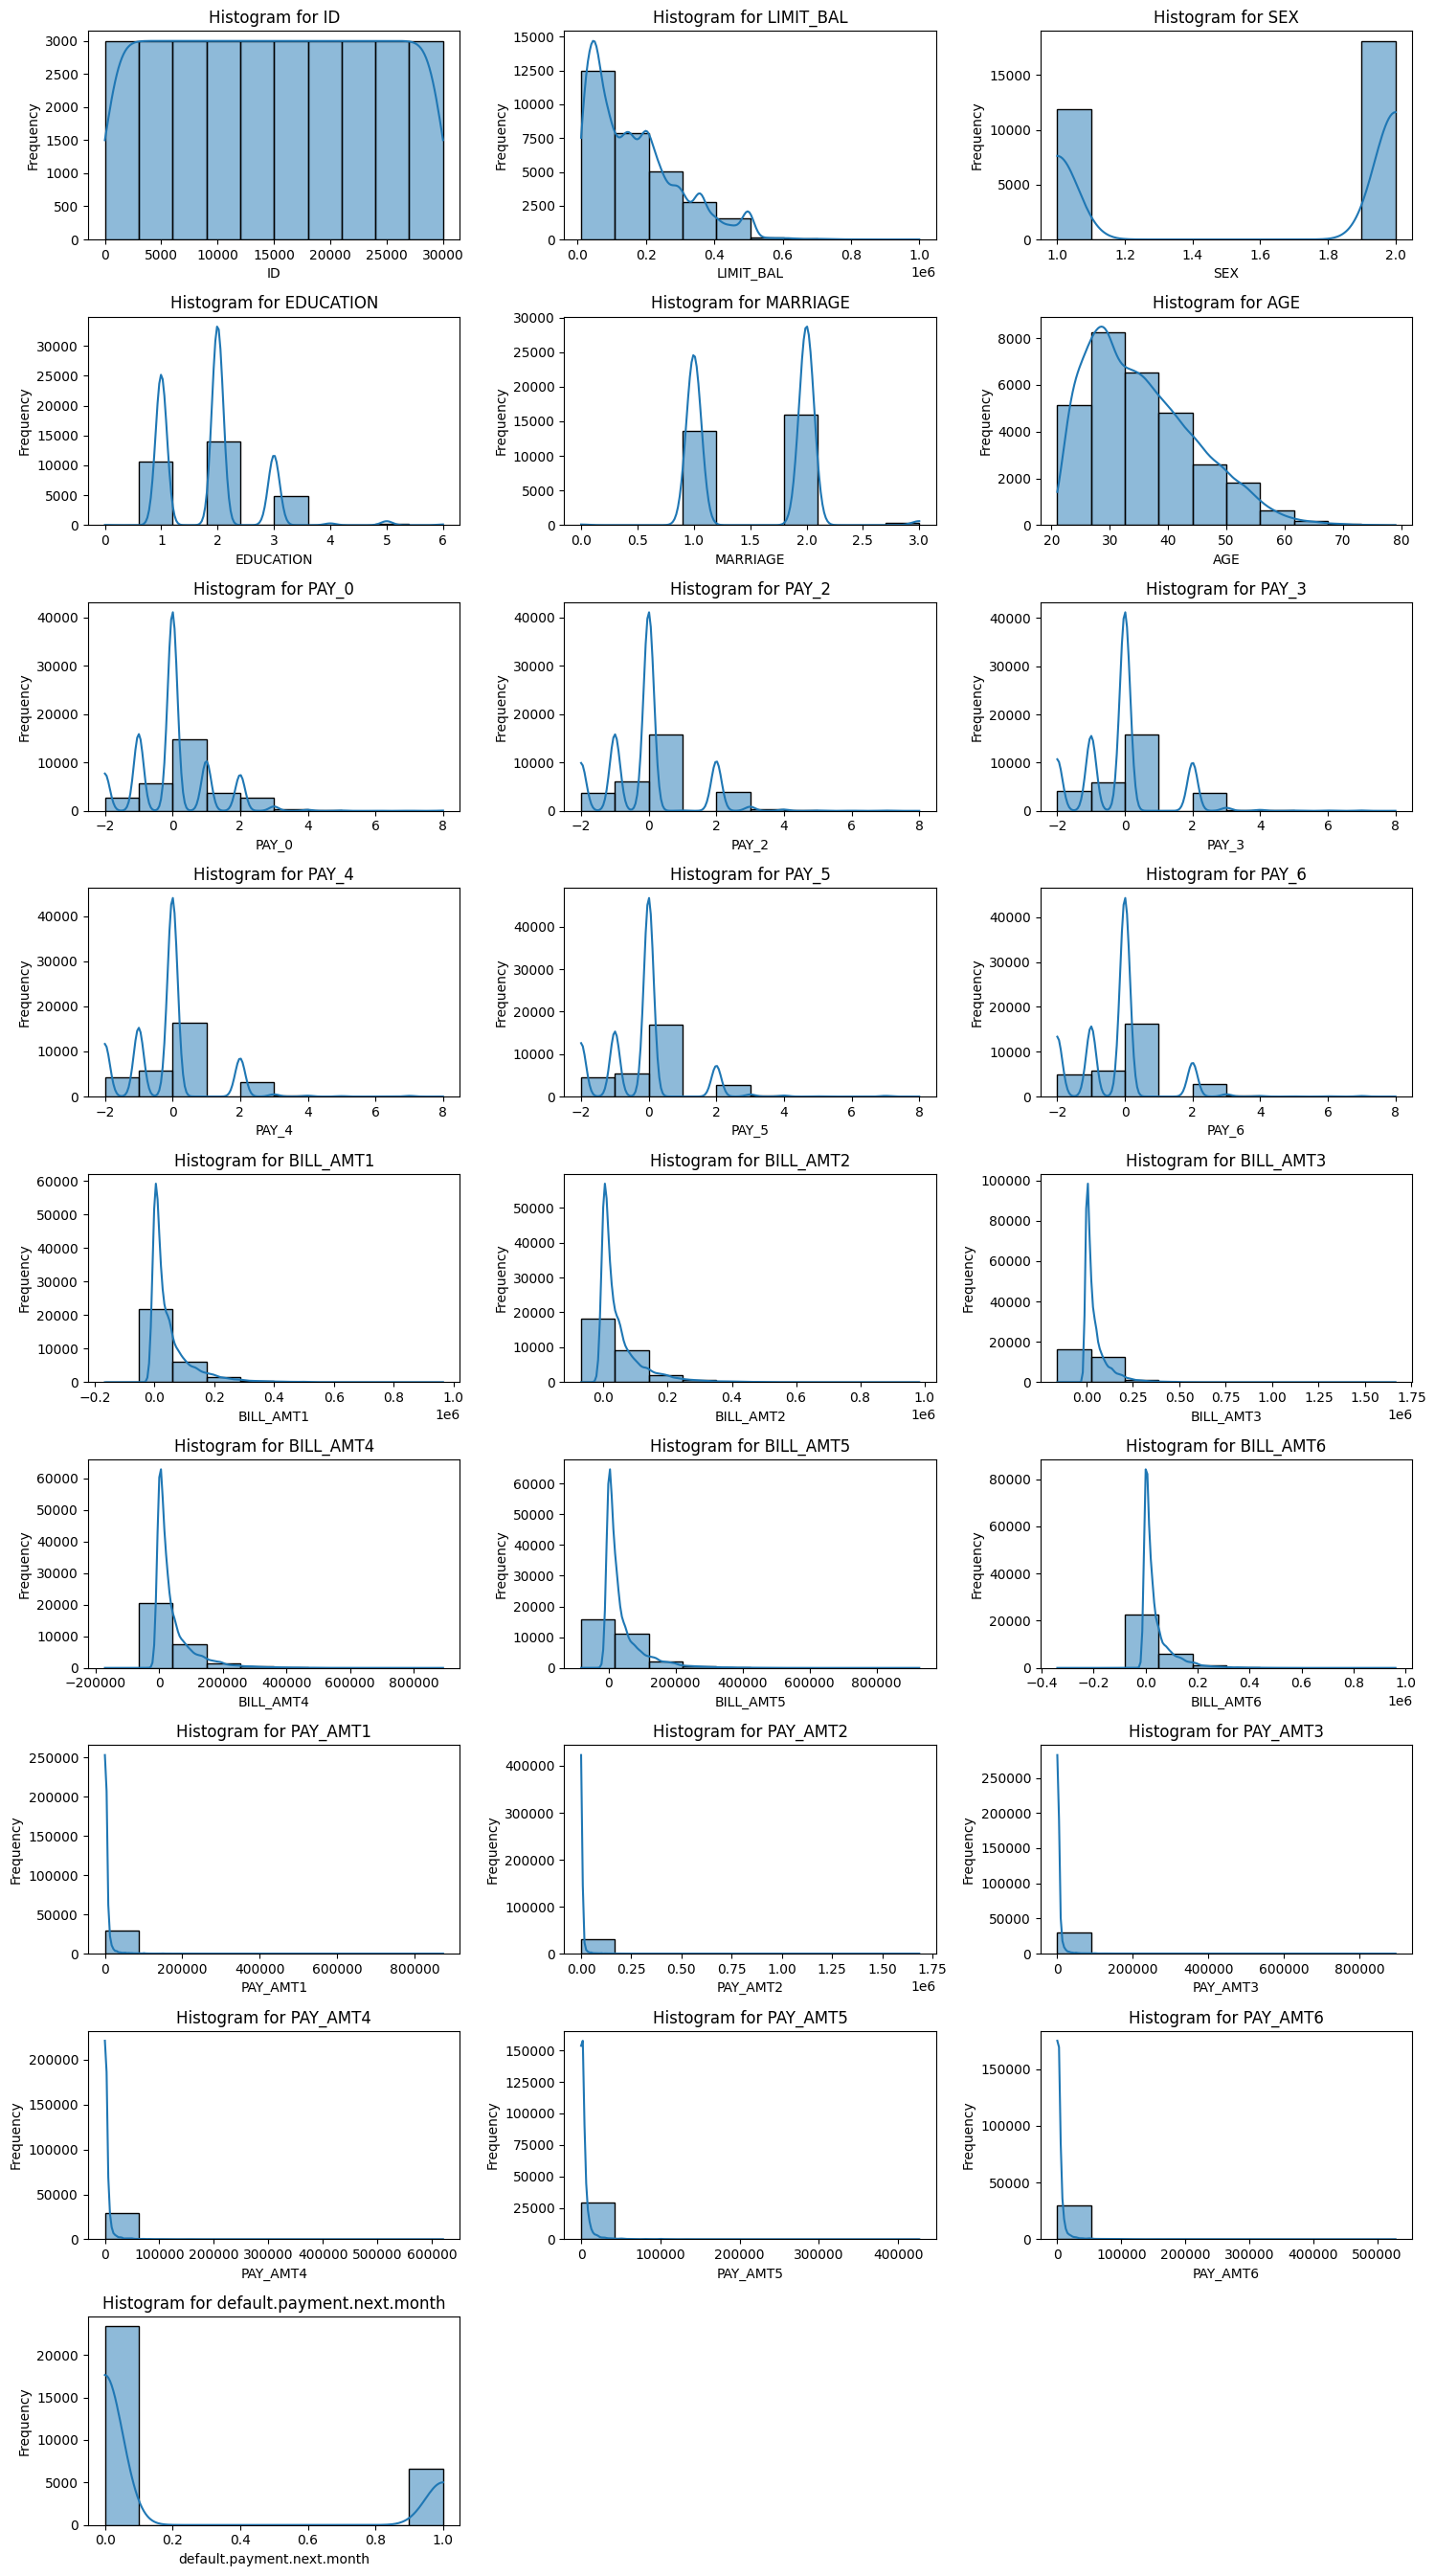

In [ ]:
#b. Plot the univariate distribution.
n_cols = 3

# Calculate the number of rows needed (rounding up if necessary)
n_rows = (len(dataset_credit.columns) + n_cols - 1) // n_cols

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each column
for i, column in enumerate(dataset_credit.columns):
    sns.histplot(dataset_credit[column], bins=10, kde=True, edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Histogram for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()

In [ ]:
#c. Convert the relevant variables such as payment variables (Pay0-Pay6 and customer related variables)
#to categorical variables as appropriate.
# List of PAY_0 to PAY_6 columns
pay_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Check the datatype of pay_columns
print(dataset_credit[pay_columns].dtypes)

PAY_0    int64
PAY_2    int64
PAY_3    int64
PAY_4    int64
PAY_5    int64
PAY_6    int64
dtype: object


In [ ]:
# Convert PAY_0 to PAY_6 columns to categorical
for col in pay_columns:
    dataset_credit[col] = dataset_credit[col].astype('category')

# Check the data again to insure if it converted into catagorical data properly
print(dataset_credit[pay_columns].dtypes)

PAY_0    category
PAY_2    category
PAY_3    category
PAY_4    category
PAY_5    category
PAY_6    category
dtype: object


In [ ]:
#Checking the data type of column 'SEX','MARRIAGE','EDUCATION'
print(dataset_credit[['SEX','MARRIAGE','EDUCATION']].dtypes)

SEX          int64
MARRIAGE     int64
EDUCATION    int64
dtype: object


In [ ]:
# 'SEX','MARRIAGE','SEX','EDUCATION' to catagory datatype
dataset_credit[['SEX','MARRIAGE','EDUCATION']]=dataset_credit[['SEX','MARRIAGE','EDUCATION']].astype('category')

In [ ]:
#printing the datatypes of all the columns
print(dataset_credit.dtypes)

ID                               int64
LIMIT_BAL                      float64
SEX                           category
EDUCATION                     category
MARRIAGE                      category
AGE                              int64
PAY_0                         category
PAY_2                         category
PAY_3                         category
PAY_4                         category
PAY_5                         category
PAY_6                         category
BILL_AMT1                      float64
BILL_AMT2                      float64
BILL_AMT3                      float64
BILL_AMT4                      float64
BILL_AMT5                      float64
BILL_AMT6                      float64
PAY_AMT1                       float64
PAY_AMT2                       float64
PAY_AMT3                       float64
PAY_AMT4                       float64
PAY_AMT5                       float64
PAY_AMT6                       float64
default.payment.next.month       int64
dtype: object


<b>1.3	Find the variables that are correlated and the variables that might help in finding the defaulters next month using a few plots. The plots should provide insights on the following:<br>
a.	The independent variable that should help identify those who will default from the next month’s credit card payment </br>
b.	The relation between dependent and independent variables<br>
c.	The correlations among the variables, etc.</br></b>


Droping 'ID' column to focus on the columns which helps in predicting a customer as default or non default.

In [ ]:
dataset= dataset_credit.drop('ID', axis=1)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   LIMIT_BAL                   30000 non-null  float64 
 1   SEX                         30000 non-null  category
 2   EDUCATION                   30000 non-null  category
 3   MARRIAGE                    30000 non-null  category
 4   AGE                         30000 non-null  int64   
 5   PAY_0                       30000 non-null  category
 6   PAY_2                       30000 non-null  category
 7   PAY_3                       30000 non-null  category
 8   PAY_4                       30000 non-null  category
 9   PAY_5                       30000 non-null  category
 10  PAY_6                       30000 non-null  category
 11  BILL_AMT1                   30000 non-null  float64 
 12  BILL_AMT2                   30000 non-null  float64 
 13  BILL_AMT3       

In [ ]:
num_columns=["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4"
         ,"PAY_AMT5","PAY_AMT6","LIMIT_BAL","AGE","default.payment.next.month"]
num_data=dataset[num_columns]

In [ ]:
num_data.head()

BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0     3913.0     3102.0      689.0        0.0        0.0        0.0       0.0   
1     2682.0     1725.0     2682.0     3272.0     3455.0     3261.0       0.0   
2    29239.0    14027.0    13559.0    14331.0    14948.0    15549.0    1518.0   
3    46990.0    48233.0    49291.0    28314.0    28959.0    29547.0    2000.0   
4     8617.0     5670.0    35835.0    20940.0    19146.0    19131.0    2000.0   

   PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  LIMIT_BAL  AGE  \
0     689.0       0.0       0.0       0.0       0.0    20000.0   24   
1    1000.0    1000.0    1000.0       0.0    2000.0   120000.0   26   
2    1500.0    1000.0    1000.0    1000.0    5000.0    90000.0   34   
3    2019.0    1200.0    1100.0    1069.0    1000.0    50000.0   37   
4   36681.0   10000.0    9000.0     689.0     679.0    50000.0   57   

   default.payment.next.month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0

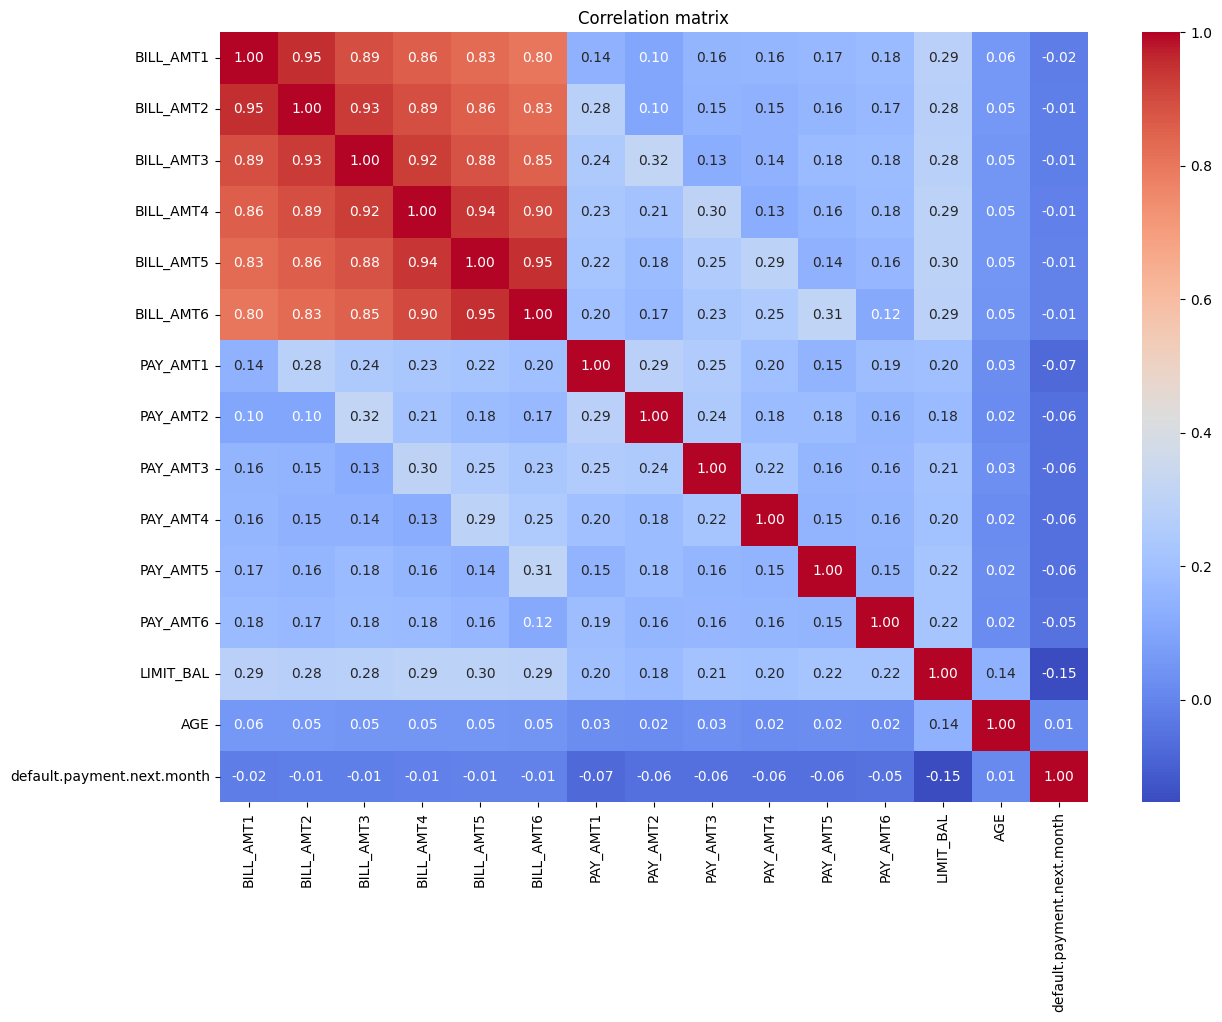

In [ ]:
#a.	The independent variable that should help identify those who will default from the next month’s credit card payment
#b.	The relation between dependent and independent variables
#c.	The correlations among the variables, etc.
# Compute the correlation matrix
corr_matrix = num_data.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()

corelation value for BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5 and BILL_AMT6 is higher than 0.5 and is showing that these varibales are highly corelated with each others, causing the mutlicolinearity.

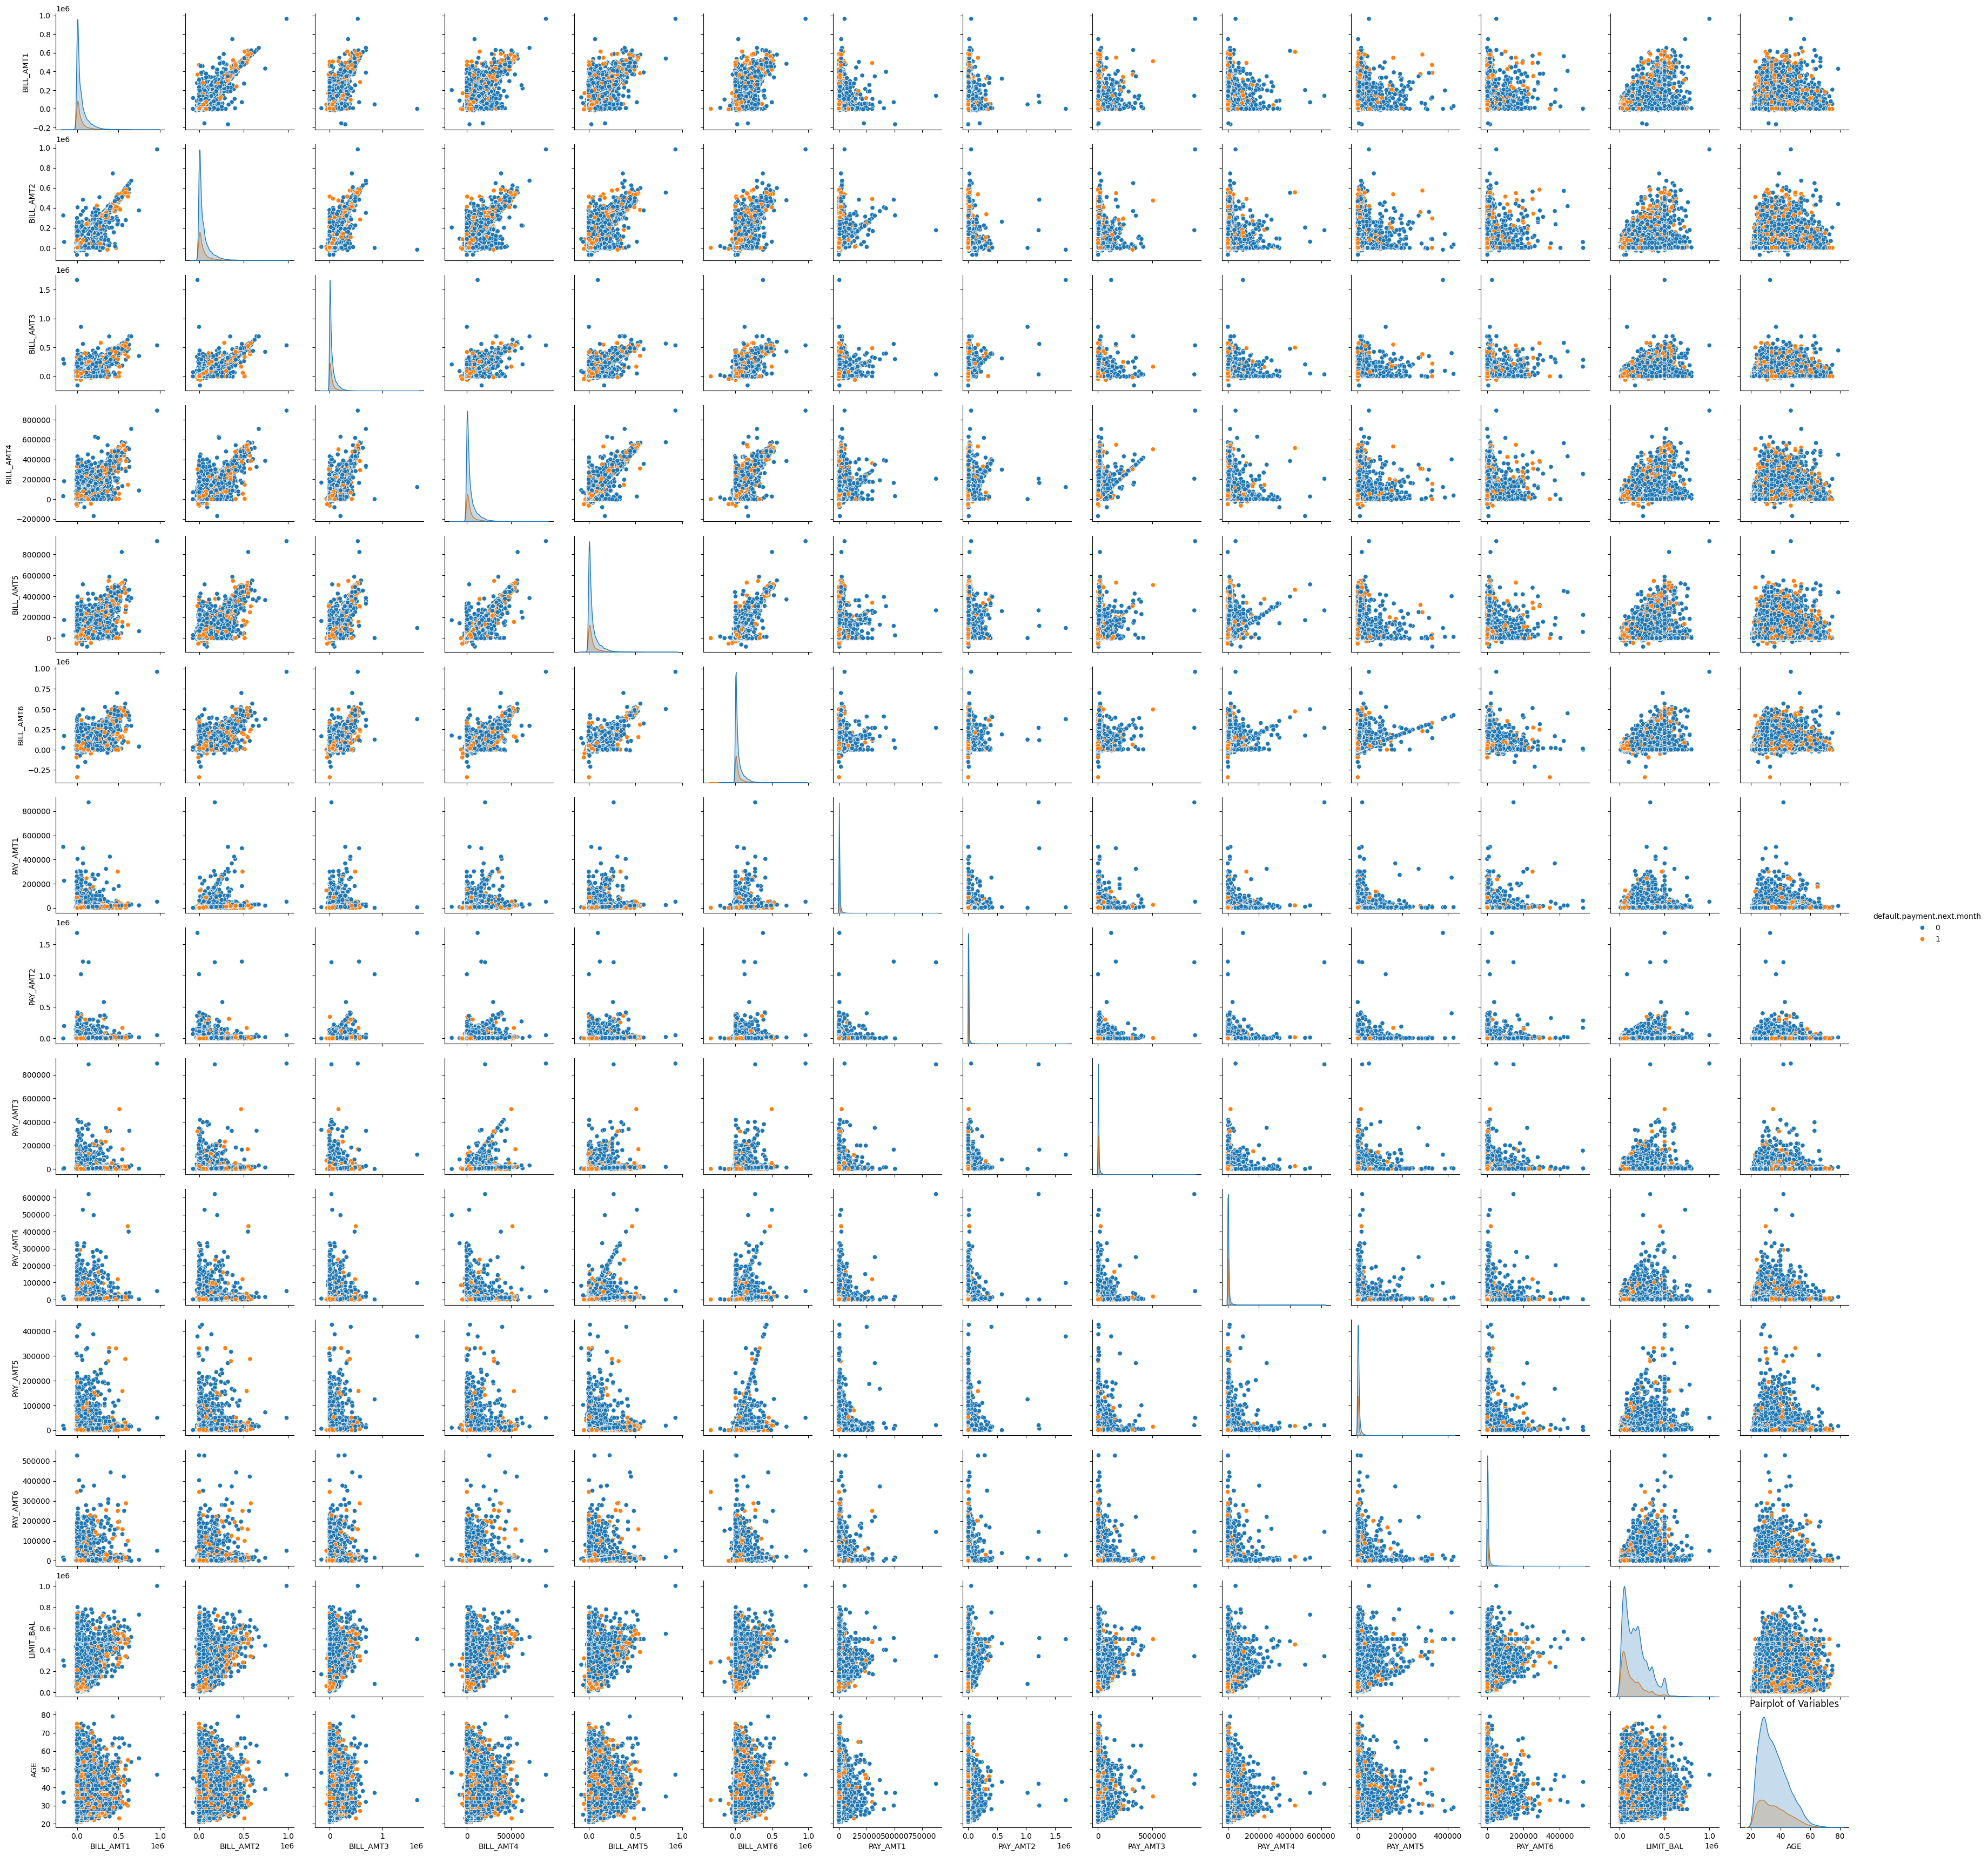

In [ ]:
#a.	The independent variable that should help identify those who will default from the next month’s credit card payment
#b.	The relation between dependent and independent variables
#c.	The correlations among the variables, etc.
sns.pairplot(num_data, hue="default.payment.next.month")
plt.title('Pairplot of Variables')
plt.show()

We can see from the pairplot that elderly people are less likely to default than youger people. Elderly People with high limit balance are less likely to default than the younger people with low limit balance. people with high pay amount and high limit balance are alos less likely to default than the people with low pay amount and low limit balance.

In [ ]:
# 'default.payment.next.month'' to catagory datatype
dataset['default.payment.next.month']=dataset['default.payment.next.month'].astype('category')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   LIMIT_BAL                   30000 non-null  float64 
 1   SEX                         30000 non-null  category
 2   EDUCATION                   30000 non-null  category
 3   MARRIAGE                    30000 non-null  category
 4   AGE                         30000 non-null  int64   
 5   PAY_0                       30000 non-null  category
 6   PAY_2                       30000 non-null  category
 7   PAY_3                       30000 non-null  category
 8   PAY_4                       30000 non-null  category
 9   PAY_5                       30000 non-null  category
 10  PAY_6                       30000 non-null  category
 11  BILL_AMT1                   30000 non-null  float64 
 12  BILL_AMT2                   30000 non-null  float64 
 13  BILL_AMT3       

                               PAY_0     PAY_2     PAY_3     PAY_4     PAY_5  \
PAY_0                       1.000000  0.627170  0.548112  0.516156  0.486441   
PAY_2                       0.627170  1.000000  0.799388  0.713212  0.673749   
PAY_3                       0.548112  0.799388  1.000000  0.801047  0.718457   
PAY_4                       0.516156  0.713212  0.801047  1.000000  0.822179   
PAY_5                       0.486441  0.673749  0.718457  0.822179  1.000000   
PAY_6                       0.463892  0.635207  0.671428  0.731866  0.820880   
EDUCATION                   0.132288  0.168715  0.162047  0.151878  0.136501   
MARRIAGE                    0.023312  0.036950  0.041867  0.044805  0.046881   
SEX                        -0.053356 -0.072143 -0.067361 -0.060257 -0.053317   
default.payment.next.month  0.292213  0.216919  0.194771  0.173690  0.159043   

                               PAY_6  EDUCATION  MARRIAGE       SEX  \
PAY_0                       0.463892   0.132288 

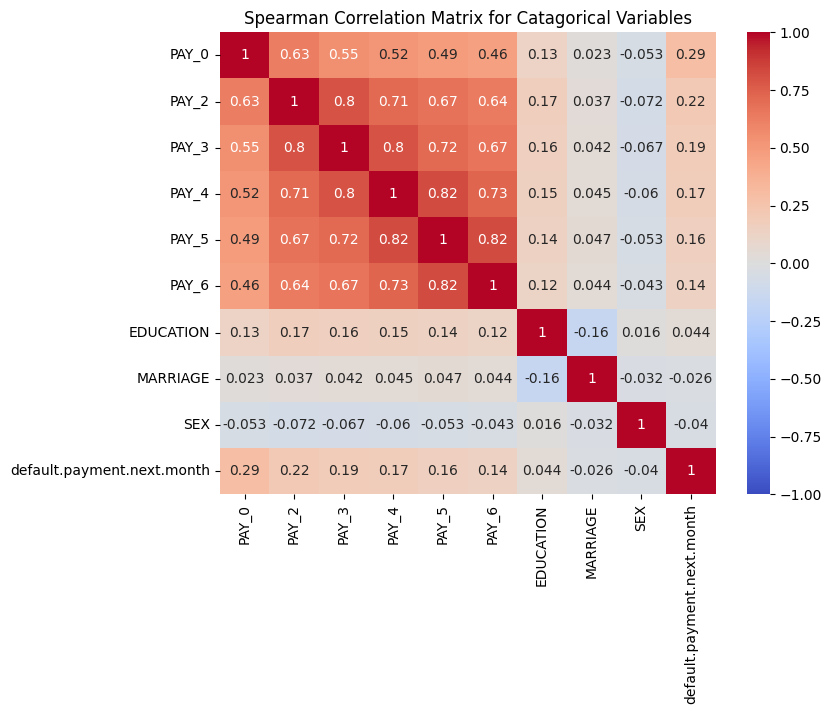

In [ ]:
# Assuming df is your DataFrame containing PAY_0 to PAY_6
Catagorical_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION', 'MARRIAGE', 'SEX', 'default.payment.next.month']

# Calculate the Spearman correlation matrix
spearman_corr_matrix = dataset[Catagorical_columns].corr(method='spearman')

# Print the Spearman correlation matrix
print(spearman_corr_matrix)

# Visualize it using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation Matrix for Catagorical Variables')
plt.show()


We can see from the spearman corelation matrix for catagorical columns that PAY_2, PAY_3, PAy_4 and PAY_5 are highly corelated to PAY_0 and PAY_6 with a corelation value more than 0.5. Corelation between PAY_0 and PAy_6 is less than 0.5 and is manageable. So we will drop PAY_2, PAY_3, PAy_4 and PAY_5 to mitigate colinearity. education is having postive corelation with Target( default.payment.next.month). PAY_0 is having the highest corelation with the default.payment.next.month. So it is the greatest predictor for Target variable.

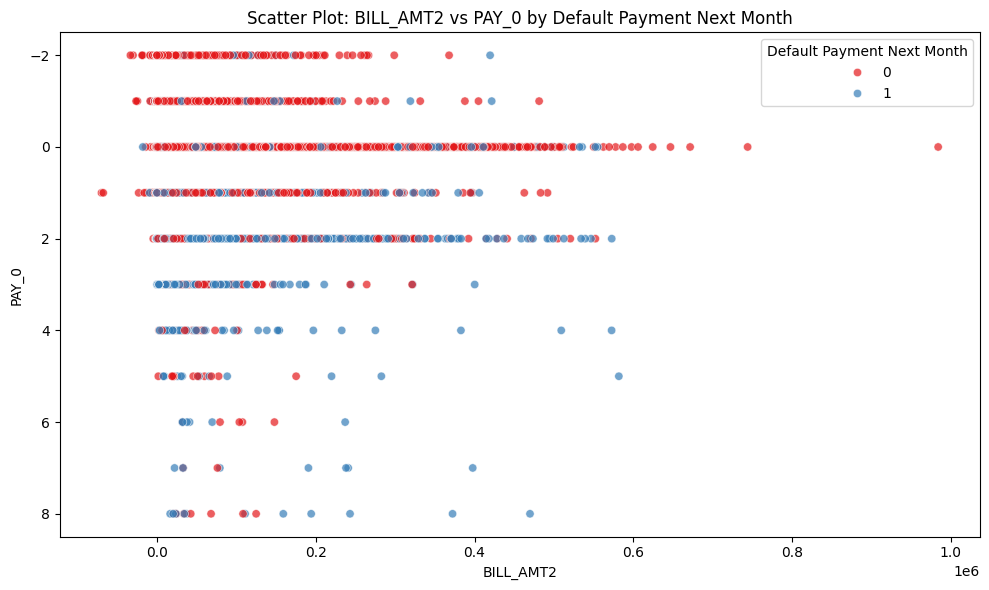

In [ ]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=dataset,
    x='BILL_AMT2',  # Continuous x-axis
    y='PAY_0',   # Continuous y-axis
    hue='default.payment.next.month',  # Color based on default status
    palette='Set1',  # Color palette
    alpha=0.7        # Set transparency for better visibility
)

# Improve plot readability
plt.title('Scatter Plot: BILL_AMT2 vs PAY_0 by Default Payment Next Month')
plt.xlabel('BILL_AMT2')
plt.ylabel('PAY_0')
plt.legend(title='Default Payment Next Month', loc='upper right')

plt.tight_layout()
plt.show()

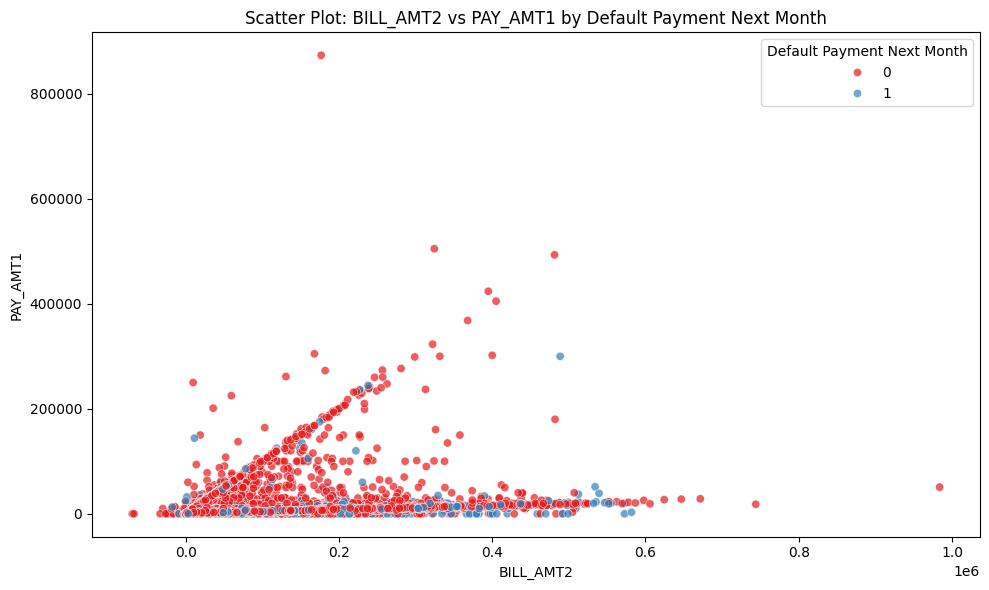

In [ ]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=dataset,
    x='BILL_AMT2',  # Continuous x-axis
    y='PAY_AMT1',   # Continuous y-axis
    hue='default.payment.next.month',  # Color based on default status
    palette='Set1',  # Color palette
    alpha=0.7        # Set transparency for better visibility
)

# Improve plot readability
plt.title('Scatter Plot: BILL_AMT2 vs PAY_AMT1 by Default Payment Next Month')
plt.xlabel('BILL_AMT2')
plt.ylabel('PAY_AMT1')
plt.legend(title='Default Payment Next Month', loc='upper right')

plt.tight_layout()
plt.show()


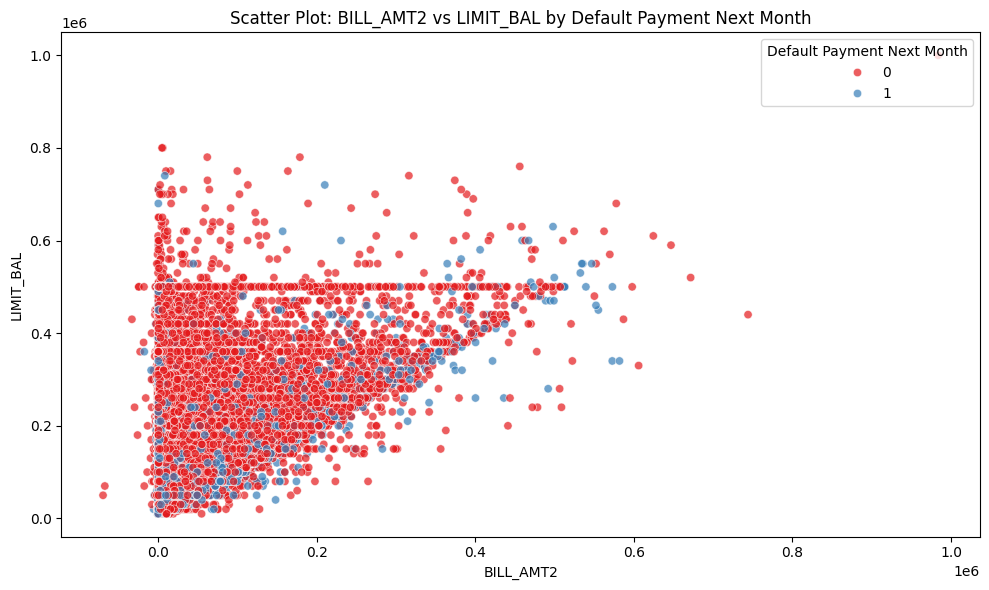

In [ ]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=dataset,
    x='BILL_AMT2',  # Continuous x-axis
    y='LIMIT_BAL',   # Continuous y-axis
    hue='default.payment.next.month',  # Color based on default status
    palette='Set1',  # Color palette
    alpha=0.7        # Set transparency for better visibility
)

# Improve plot readability
plt.title('Scatter Plot: BILL_AMT2 vs LIMIT_BAL by Default Payment Next Month')
plt.xlabel('BILL_AMT2')
plt.ylabel('LIMIT_BAL')
plt.legend(title='Default Payment Next Month', loc='upper right')

plt.tight_layout()
plt.show()

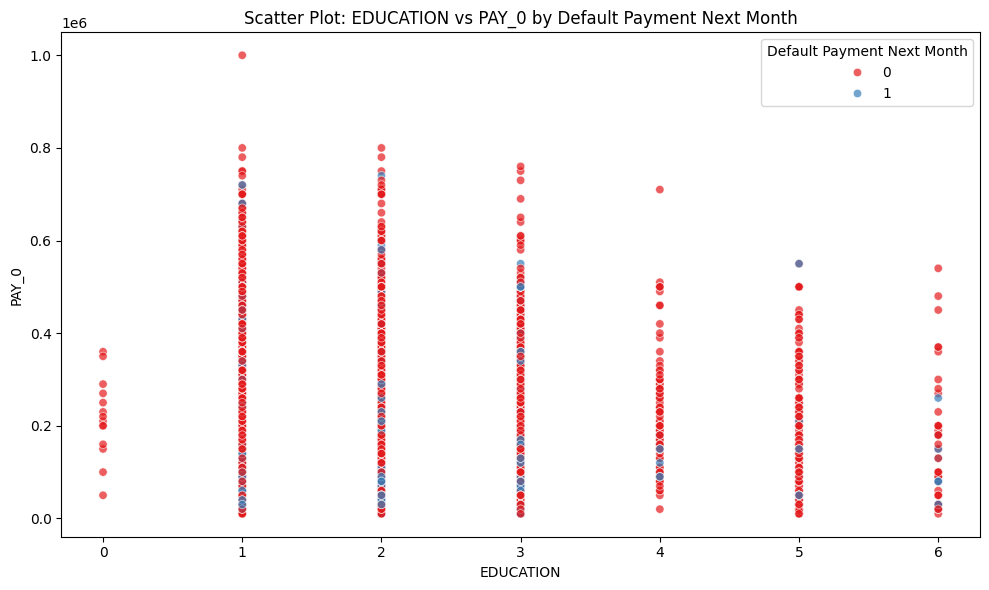

In [ ]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=dataset,
    x='EDUCATION',  # Continuous x-axis
    y='LIMIT_BAL',   # Continuous y-axis
    hue='default.payment.next.month',  # Color based on default status
    palette='Set1',  # Color palette
    alpha=0.7        # Set transparency for better visibility
)

# Improve plot readability
plt.title('Scatter Plot: EDUCATION vs PAY_0 by Default Payment Next Month')
plt.xlabel('EDUCATION')
plt.ylabel('PAY_0')
plt.legend(title='Default Payment Next Month', loc='upper right')

plt.tight_layout()
plt.show()

<b><h4>1.4	Provide your insights into the variables and their relationship based on your analysis in Task 1.3 in a markdown cell in your Jupyter notebook.</b></h5>

Variables BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5 and BILL_AMT6 are showing high correlation among each other and causing the multicollinearity. So out of these variables we will be keeping only BILL_AMT2 while dropping rest. BILL_AMT2 is having highest positive relationship with PAY_0.

PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6 variables are also showing high correlation with each others and causing multicolinearity. However on the other hands these variables are showing highest positive corelation with the dependent (Target) variables. Corelation of PAY_0 with dependent variable is highest 0.32 which shows that it is the greatest predictor of the dependent variable. Corelation between PAY_0 and PAY_6 is 0.46 which is less than 0.5 and is manageable. Corelation of PAY_2, PAY_3, PAY_4 and PAY_5 with PAY_0 and PAY_6 is higher than 0.5 and causing muticolinearity. To mitigate muticolinearity we will remove PAY_2, PAY_3, PAY_4 and PAY_5.

Variable AGE is moderately corelated with dependent variable. From pairplot can be seen that elderly people with high limit balance re less likely to default.

From scatter, pairplot plot and correlation matrix can be seen LIMIT_BAL and BILL_AMT2 is having a positive relationship.  A customer having high LIMIT_BAL and BILL_AMT usually is less likely get defaulted. Same is for PAY_0 and BILL_AMT2.

Education is also having positive relationship with dependent variable. People studied graduate school,university and high school with high LIMIT_BAL are less likely to default.

From the scatter plot and pair plot of BILL_AMT2 and the PAY_AMT (PAY_AMT1, PAY_AMT2,...,PAY_AMT6) can be seen, those customers having high billing amount along with the high PAY_AMT are less likely to default.

PAY_0, BILL_AMT2, AGE and PAY_AMT play an important role in predicting wether a customer will default or not.

<p><h5><b>Task 2:<br>
Import “Train.csv” into your Jupyter notebook.
</br>2.1	Check the total number of observations and print a few records. Please note that the variable conversion in the raw data, similar to Task 1.2 should be applied
Hint: Convert the relevant variables such as payment variables, Pay0-Pay6, and customer related variables (demographic) to categorical variables as appropriate.<br>
2.2	Fit a logistic regression after making the dataset balanced.
Hint: Use class weight parameter.</br>
2.3	Remove the variable(s) that would cause multicollinearity. Explicitly state the variable(s) that you are dropping in a markdown cell in your Jupyter notebook.
Hint: To remove a variable, use the drop function.
<br>Import “Test.csv” into your Jupyter notebook.</br>
2.4	Test the model on the test dataset. Please note that the variable conversion in the raw data, similar to Task 1.2 should be applied.
Hint: Convert the relevant variables such as payment variables, Pay0-Pay6, and customer related variables (demographic) to categorical variables as appropriate.<br>
2.5	Plot the confusion matrix.</br>
2.6	Provide your insights on accuracy, precision and F1 Score in a markdown cell in your Jupyter notebook.
</br></b></h5></p>


In [ ]:
dataset_credit_train=pd.read_csv("/content/drive/MyDrive/Week31-32/Train.csv")

In [ ]:
#2.1 Check the total number of observations and print a few records.
#Checking the total number of observations and variables.
print(f"Shape of dataset_credit_train is: {np.shape(dataset_credit_train)}")
print(f"Total number of observation are: {np.shape(dataset_credit_train)[0]}")
print(f"Total number of variables are: {np.shape(dataset_credit_train)[1]}")

Shape of dataset_credit_train is: (26000, 25)
Total number of observation are: 26000
Total number of variables are: 25


In [ ]:
#Printing a few
dataset_credit_train.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   2     120000    2          2         2   26     -1      2      0      0   
1   4      50000    2          2         1   37      0      0      0      0   
2   5      50000    1          2         1   57     -1      0     -1      0   
3   6      50000    1          1         2   37      0      0      0      0   
4   7     500000    1          1         2   29      0      0      0      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
1  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
2  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   
3  ...    19394.0    19619.0    20024.0    2500.0    1815.0     657.0   
4  ...   542653.0   483003.0   473944.0   55000.0   40000.0   38000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  Default  
0    1000.0       0.0    2000.0        1  
1    1100.0    1069.0    1000.0        0  
2    9000.0     689.0     679.0        0  
3    1000.0    1000.0     800.0        0  
4   20239.0   13750.0   13770.0        0  

[5 rows x 25 columns]

In [ ]:
#Descriptive statics and manipulating the data
#Datatype
dataset_credit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26000 entries, 0 to 25999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         26000 non-null  int64  
 1   LIMIT_BAL  26000 non-null  int64  
 2   SEX        26000 non-null  int64  
 3   EDUCATION  26000 non-null  int64  
 4   MARRIAGE   26000 non-null  int64  
 5   AGE        26000 non-null  int64  
 6   PAY_0      26000 non-null  int64  
 7   PAY_2      26000 non-null  int64  
 8   PAY_3      26000 non-null  int64  
 9   PAY_4      26000 non-null  int64  
 10  PAY_5      26000 non-null  int64  
 11  PAY_6      26000 non-null  int64  
 12  BILL_AMT1  26000 non-null  int64  
 13  BILL_AMT2  26000 non-null  float64
 14  BILL_AMT3  26000 non-null  float64
 15  BILL_AMT4  26000 non-null  float64
 16  BILL_AMT5  26000 non-null  float64
 17  BILL_AMT6  26000 non-null  float64
 18  PAY_AMT1   26000 non-null  float64
 19  PAY_AMT2   26000 non-null  float64
 20  PAY_AM

In [ ]:
#getting data statics
dataset_credit_train.describe().T

count           mean            std       min       25%  \
ID         26000.0   14996.430462    8663.219017       2.0   7479.75   
LIMIT_BAL  26000.0  167440.846154  129672.200019   10000.0  50000.00   
SEX        26000.0       1.603654       0.489147       1.0      1.00   
EDUCATION  26000.0       1.853692       0.794793       0.0      1.00   
MARRIAGE   26000.0       1.552000       0.521830       0.0      1.00   
AGE        26000.0      35.492115       9.208619      21.0     28.00   
PAY_0      26000.0      -0.014846       1.120603      -2.0     -1.00   
PAY_2      26000.0      -0.133308       1.196524      -2.0     -1.00   
PAY_3      26000.0      -0.165154       1.195702      -2.0     -1.00   
PAY_4      26000.0      -0.218808       1.167831      -2.0     -1.00   
PAY_5      26000.0      -0.263615       1.130052      -2.0     -1.00   
PAY_6      26000.0      -0.287923       1.146532      -2.0     -1.00   
BILL_AMT1  26000.0   51285.487154   73508.698857 -165580.0   3585.50   
BILL_AMT2  26000.0   49205.394962   71001.158942  -69777.0   3003.00   
BILL_AMT3  26000.0   46995.264231   69232.190855  -61506.0   2698.00   
BILL_AMT4  26000.0   43257.653308   64212.237894 -170000.0   2400.00   
BILL_AMT5  26000.0   40279.748731   60593.196802  -81334.0   1813.00   
BILL_AMT6  26000.0   38857.180192   59331.740317 -339603.0   1261.00   
PAY_AMT1   26000.0    5659.285346   15957.380183       0.0   1000.00   
PAY_AMT2   26000.0    5883.374846   22504.227371       0.0    833.00   
PAY_AMT3   26000.0    5247.787385   16927.253814       0.0    396.00   
PAY_AMT4   26000.0    4829.973538   15446.282870       0.0    300.00   
PAY_AMT5   26000.0    4848.178808   15621.391198       0.0    251.00   
PAY_AMT6   26000.0    5198.692192   17600.463320       0.0    128.75   
Default    26000.0       0.221308       0.415135       0.0      0.00   

                50%        75%        max  
ID          14969.5   22500.25    30000.0  
LIMIT_BAL  140000.0  240000.00  1000000.0  
SEX             2.0       2.00        2.0  
EDUCATION       2.0       2.00        6.0  
MARRIAGE        2.0       2.00        3.0  
AGE            34.0      41.00       79.0  
PAY_0           0.0       0.00        8.0  
PAY_2           0.0       0.00        8.0  
PAY_3           0.0       0.00        8.0  
PAY_4           0.0       0.00        8.0  
PAY_5           0.0       0.00        7.0  
PAY_6           0.0       0.00        7.0  
BILL_AMT1   22586.5   67508.50   964511.0  
BILL_AMT2   21417.0   64334.75   983931.0  
BILL_AMT3   20199.0   60401.50  1664089.0  
BILL_AMT4   19117.5   54833.25   891586.0  
BILL_AMT5   18167.5   50289.00   927171.0  
BILL_AMT6   17203.5   49350.25   961664.0  
PAY_AMT1     2106.0    5009.00   505000.0  
PAY_AMT2     2010.0    5000.00  1684259.0  
PAY_AMT3     1831.5    4504.25   896040.0  
PAY_AMT4     1500.0    4023.00   528897.0  
PAY_AMT5     1500.0    4031.00   426529.0  
PAY_AMT6     1500.0    4000.00   528666.0  
Default         0.0       0.00        1.0

In [ ]:
#checking for missing or null values
dataset_credit_train.isnull() #True if the value is missing or null, False otherwise

ID  LIMIT_BAL    SEX  EDUCATION  MARRIAGE    AGE  PAY_0  PAY_2  \
0      False      False  False      False     False  False  False  False   
1      False      False  False      False     False  False  False  False   
2      False      False  False      False     False  False  False  False   
3      False      False  False      False     False  False  False  False   
4      False      False  False      False     False  False  False  False   
...      ...        ...    ...        ...       ...    ...    ...    ...   
25995  False      False  False      False     False  False  False  False   
25996  False      False  False      False     False  False  False  False   
25997  False      False  False      False     False  False  False  False   
25998  False      False  False      False     False  False  False  False   
25999  False      False  False      False     False  False  False  False   

       PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0      False  False  ...      False      False      False     False     False   
1      False  False  ...      False      False      False     False     False   
2      False  False  ...      False      False      False     False     False   
3      False  False  ...      False      False      False     False     False   
4      False  False  ...      False      False      False     False     False   
...      ...    ...  ...        ...        ...        ...       ...       ...   
25995  False  False  ...      False      False      False     False     False   
25996  False  False  ...      False      False      False     False     False   
25997  False  False  ...      False      False      False     False     False   
25998  False  False  ...      False      False      False     False     False   
25999  False  False  ...      False      False      False     False     False   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  Default  
0         False     False     False     False    False  
1         False     False     False     False    False  
2         False     False     False     False    False  
3         False     False     False     False    False  
4         False     False     False     False    False  
...         ...       ...       ...       ...      ...  
25995     False     False     False     False    False  
25996     False     False     False     False    False  
25997     False     False     False     False    False  
25998     False     False     False     False    False  
25999     False     False     False     False    False  

[26000 rows x 25 columns]

In [ ]:
missing_values_train=dataset_credit_train.isnull().sum()  #total count of missing or null values for each column
print(missing_values_train[missing_values_train > 0]) #Print the columns with their corresponding missing or null value counts

Series([], dtype: int64)


This 'Train.csv' dataset does not have any missing or null values.

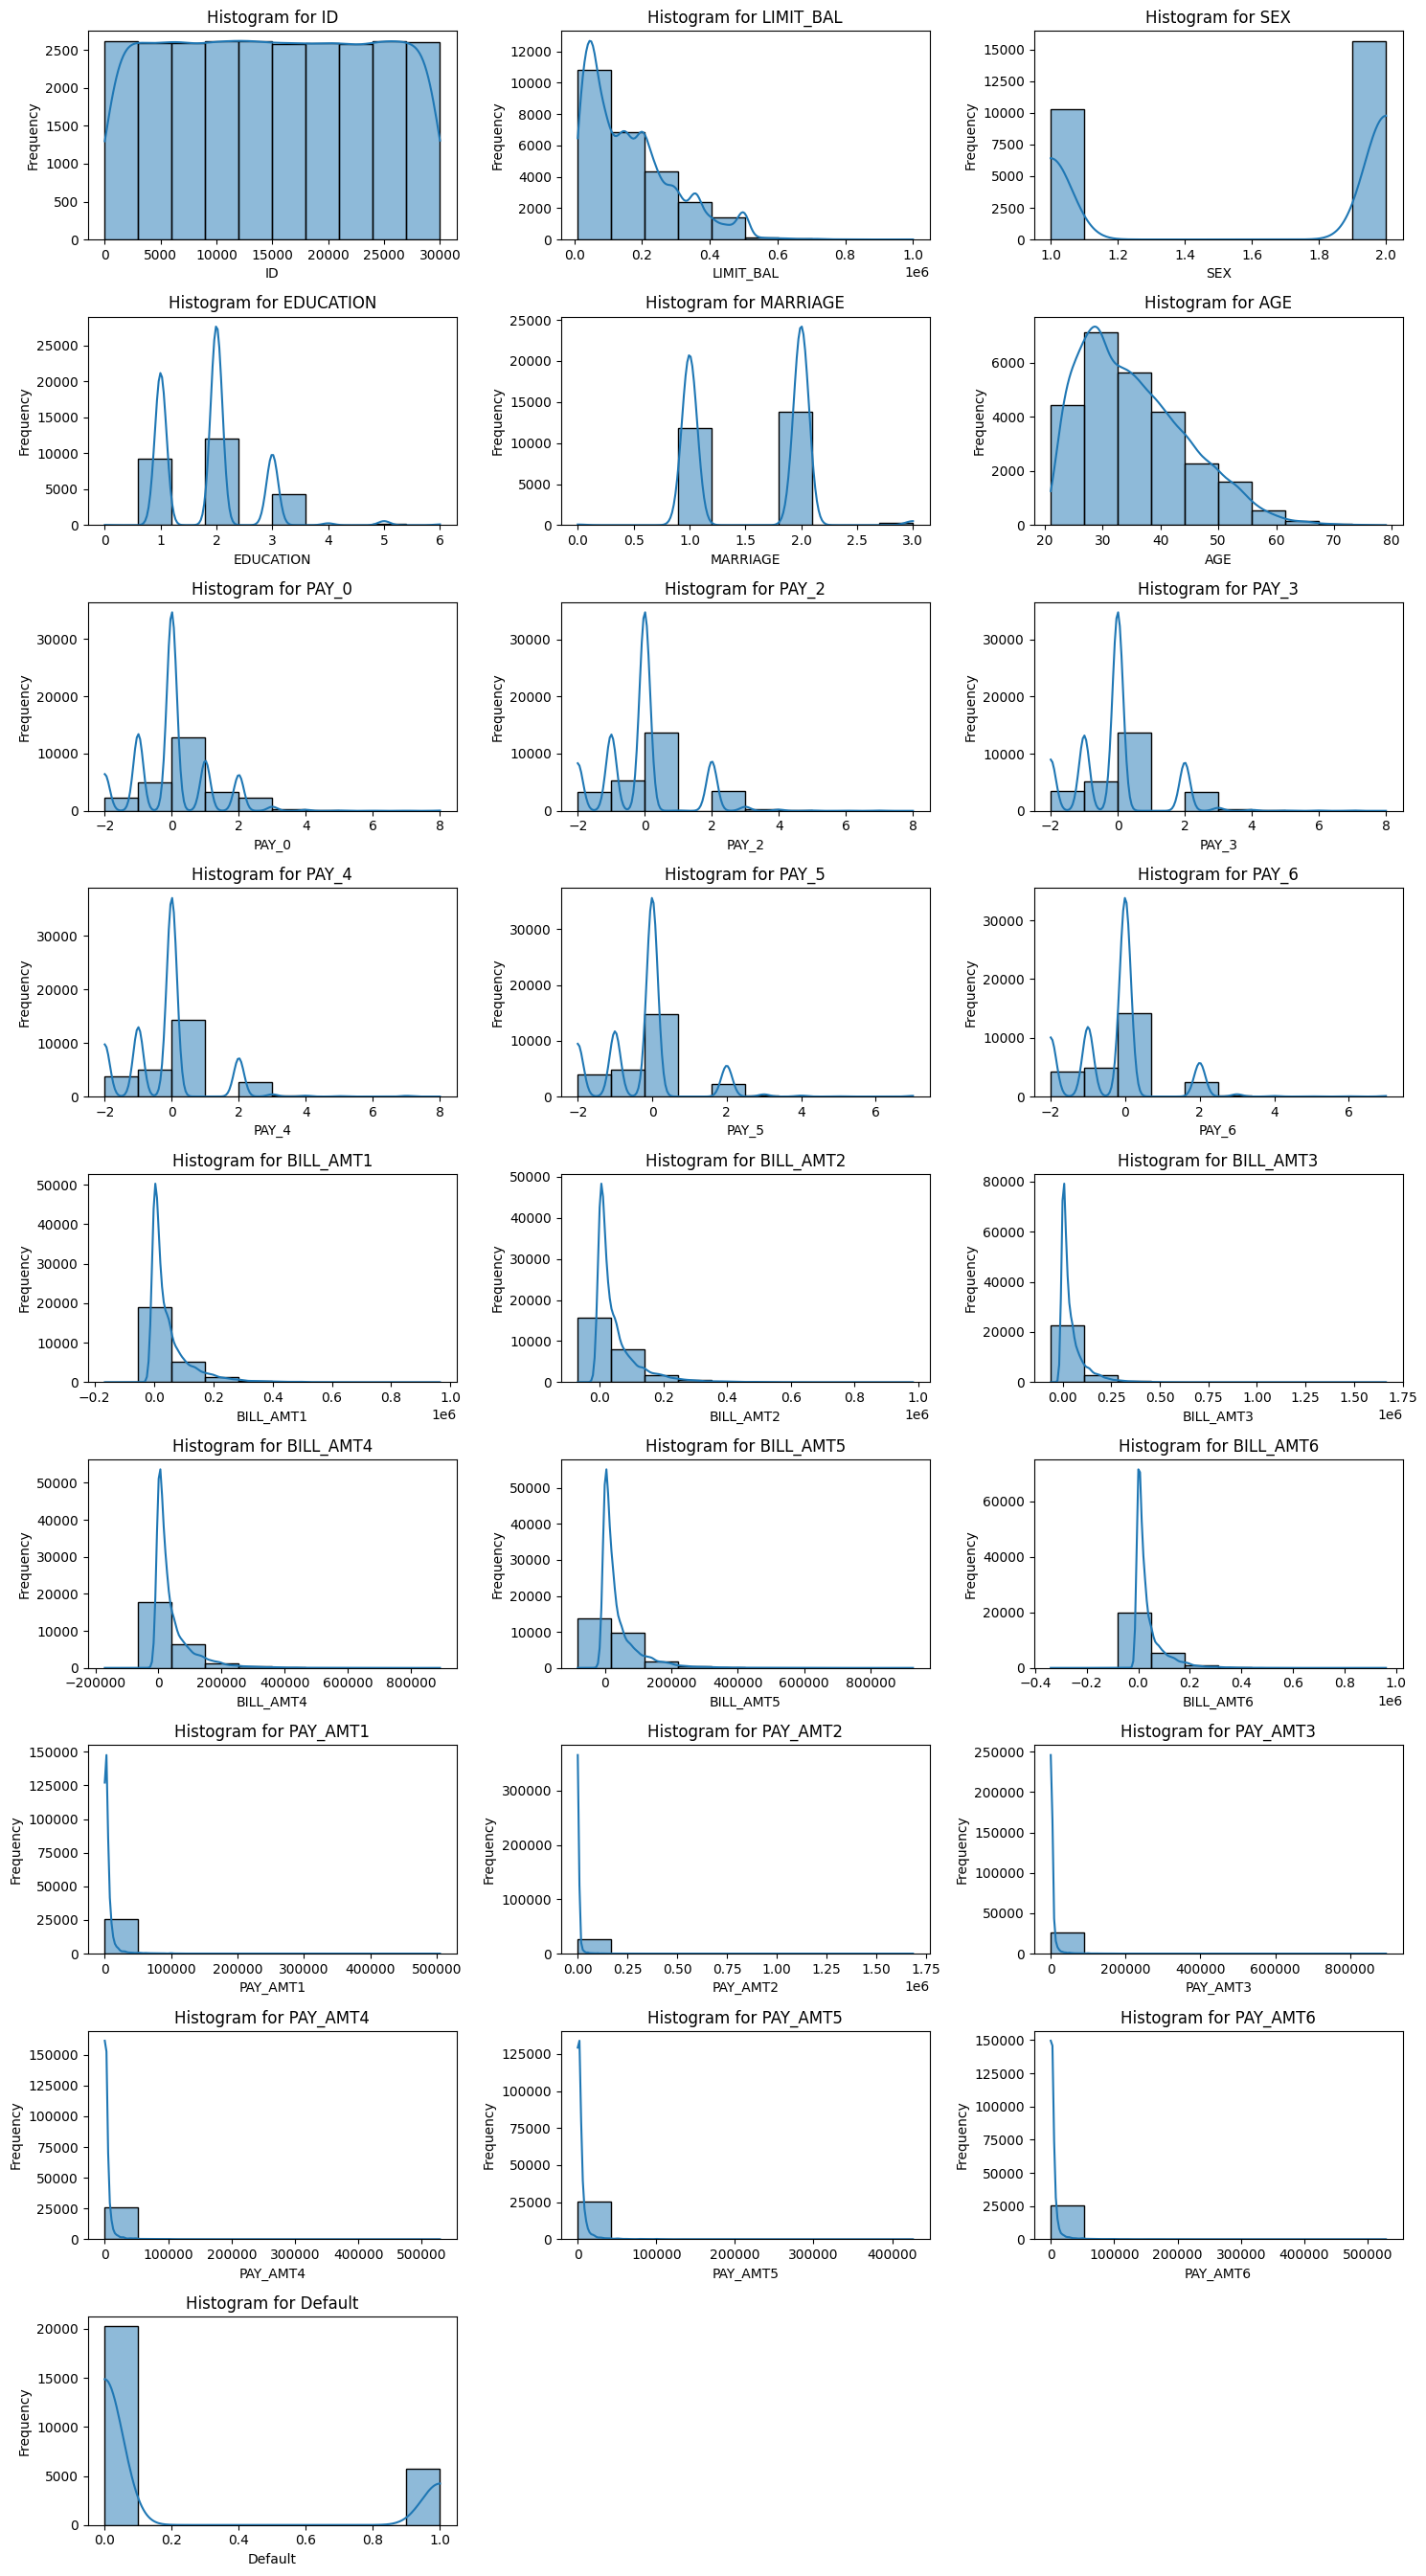

In [ ]:
#b. Plot the univariate distribution.
n_cols = 3

# Calculate the number of rows needed (rounding up if necessary)
n_rows = (len(dataset_credit_train.columns) + n_cols - 1) // n_cols

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each column
for i, column in enumerate(dataset_credit_train.columns):
    sns.histplot(dataset_credit_train[column], bins=10, kde=True, edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Histogram for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
#c. Convert the relevant variables such as payment variables (Pay0-Pay6 and customer related variables)
#to categorical variables as appropriate.
# List of PAY_0 to PAY_6 columns
selected_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','EDUCATION', 'SEX','MARRIAGE']

# Check the datatype of pay_columns
print(dataset_credit_train[selected_columns].dtypes)

PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
EDUCATION    int64
SEX          int64
MARRIAGE     int64
dtype: object


In [ ]:
# Convert selected columns to categorical
for col in selected_columns:
    dataset_credit_train[col] = dataset_credit_train[col].astype('category')

# Check the data again to insure if it converted into catagorical data properly
print(dataset_credit_train[selected_columns].dtypes)

PAY_0        category
PAY_2        category
PAY_3        category
PAY_4        category
PAY_5        category
PAY_6        category
EDUCATION    category
SEX          category
MARRIAGE     category
dtype: object


In [ ]:
#checking the datatypes after conversion
print(dataset_credit_train.dtypes)

ID              int64
LIMIT_BAL       int64
SEX          category
EDUCATION    category
MARRIAGE     category
AGE             int64
PAY_0        category
PAY_2        category
PAY_3        category
PAY_4        category
PAY_5        category
PAY_6        category
BILL_AMT1       int64
BILL_AMT2     float64
BILL_AMT3     float64
BILL_AMT4     float64
BILL_AMT5     float64
BILL_AMT6     float64
PAY_AMT1      float64
PAY_AMT2      float64
PAY_AMT3      float64
PAY_AMT4      float64
PAY_AMT5      float64
PAY_AMT6      float64
Default         int64
dtype: object


2.3	Remove the variable(s) that would cause multicollinearity. Explicitly state the variable(s) that you are dropping in a markdown cell in your Jupyter notebook.
Hint: To remove a variable, use the drop function.


we are removing column ID as to get focus onto our features effecting credit customers.

In [ ]:
dataset_train= dataset_credit_train.drop('ID', axis=1)

Variables PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6, are higly corelated with each other.keeping PAY_0 and PAY_6 only while dropping rest.
Variables BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5 and BILL_AMT6 are also having high corelation with corelation values more than 0.5. keeping only BILL_AMT2 while dropping rest.

In [ ]:
#dropping variables
dataset_train = dataset_train.drop(columns=['PAY_2','PAY_3', 'PAY_4','PAY_5','BILL_AMT5','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT1','BILL_AMT6'])

In [ ]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26000 entries, 0 to 25999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   LIMIT_BAL  26000 non-null  int64   
 1   SEX        26000 non-null  category
 2   EDUCATION  26000 non-null  category
 3   MARRIAGE   26000 non-null  category
 4   AGE        26000 non-null  int64   
 5   PAY_0      26000 non-null  category
 6   PAY_6      26000 non-null  category
 7   BILL_AMT2  26000 non-null  float64 
 8   PAY_AMT1   26000 non-null  float64 
 9   PAY_AMT2   26000 non-null  float64 
 10  PAY_AMT3   26000 non-null  float64 
 11  PAY_AMT4   26000 non-null  float64 
 12  PAY_AMT5   26000 non-null  float64 
 13  PAY_AMT6   26000 non-null  float64 
 14  Default    26000 non-null  int64   
dtypes: category(5), float64(7), int64(3)
memory usage: 2.1 MB


Checking weather dataset_train is balanced or not

In [ ]:
count_non_default = len(dataset_train[dataset_train['Default']==0])
count_default = len(dataset_train[dataset_train['Default']==1])
pct_of_non_default = count_non_default/(count_non_default+count_default)
print("percentage of non default is", round(pct_of_non_default*100,2))
pct_of_default = count_default/(count_default+count_non_default)
print("percentage of defaulted", round(pct_of_default*100,2))

percentage of non default is 77.87
percentage of defaulted 22.13


In [ ]:
# Step 3: Separate features and target variable
X_train = dataset_train.drop('Default', axis=1)
y_train = dataset_train['Default']
y_train.info()
X_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 26000 entries, 0 to 25999
Series name: Default
Non-Null Count  Dtype
--------------  -----
26000 non-null  int64
dtypes: int64(1)
memory usage: 203.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26000 entries, 0 to 25999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   LIMIT_BAL  26000 non-null  int64   
 1   SEX        26000 non-null  category
 2   EDUCATION  26000 non-null  category
 3   MARRIAGE   26000 non-null  category
 4   AGE        26000 non-null  int64   
 5   PAY_0      26000 non-null  category
 6   PAY_6      26000 non-null  category
 7   BILL_AMT2  26000 non-null  float64 
 8   PAY_AMT1   26000 non-null  float64 
 9   PAY_AMT2   26000 non-null  float64 
 10  PAY_AMT3   26000 non-null  float64 
 11  PAY_AMT4   26000 non-null  float64 
 12  PAY_AMT5   26000 non-null  float64 
 13  PAY_AMT6   26000 non-null  float64 
dtypes: category(5), float64(7), i

In [ ]:
# Step 1: Scale the Features
scaler = StandardScaler()

# Fit the scaler on training data
scaler.fit(X_train)

# Transform training data
X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Step 2: Encode the Target Variable
label_encoder = LabelEncoder()

# Fit the label encoder on the target data
y_train_encoded = label_encoder.fit_transform(y_train)
#y_test_encoded = label_encoder.transform(y_test)

In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train_encoded, test_size=0.2, random_state=42)

In [ ]:
# Calculate class weights to balance the dataset
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Convert class weights to a dictionary for the Logistic Regression model
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

In [ ]:
# Create a Logistic Regression model with class weights
model = LogisticRegression(class_weight=class_weights_dict, max_iter=1000)

# Train the model
model.fit(X_train_scaled, y_train_encoded)

LogisticRegression(class_weight={0: 0.6433652953912774, 1: 2.243797195253506},
                   max_iter=1000)

In [ ]:
# Predict on the training set
y_train_pred = model.predict(X_train_scaled)

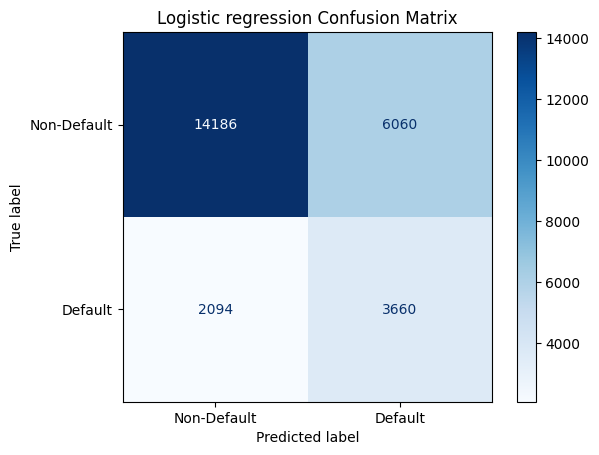

Accuracy: 0.69
Logistic regression Confusion Matrix:
[[14186  6060]
 [ 2094  3660]]
Classification Report for Training Set:
              precision    recall  f1-score   support

 Non-Default       0.87      0.70      0.78     20246
     Default       0.38      0.64      0.47      5754

    accuracy                           0.69     26000
   macro avg       0.62      0.67      0.62     26000
weighted avg       0.76      0.69      0.71     26000



In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(y_train_encoded, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Default', 'Default'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Logistic regression Confusion Matrix')
plt.show()

# Provide insights
accuracy = accuracy_score(y_train_encoded, y_train_pred)

print(f'Accuracy: {accuracy:.2f}')

#Confusion Matrix
cm = confusion_matrix(y_train_encoded, y_train_pred)
print("Logistic regression Confusion Matrix:")
print(cm)

# Print the classification reports
print("Classification Report for Training Set:")
print(classification_report(y_train_encoded, y_train_pred, target_names=['Non-Default', 'Default']))

<b>TEST DATASET</b>

<b>Import “Test.csv” into your Jupyter notebook. </b>

In [ ]:
dataset_credit_test=pd.read_csv("/content/drive/MyDrive/Week31-32/Test.csv")

In [ ]:
#Check the total number of observations and print a few records.
#Checking the total number of observations and variables.
print(f"Shape of dataset is: {np.shape(dataset_credit_test)}")
print(f"Total number of observation are: {np.shape(dataset_credit_test)[0]}")
print(f"Total number of variables are: {np.shape(dataset_credit_test)[1]}")

Shape of dataset is: (4000, 25)
Total number of observation are: 4000
Total number of variables are: 25


In [ ]:
#Printing a few
dataset_credit_test.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0   5170     140000    2          2         2   26      0      0      2   
1  22727      90000    2          1         2   31      1     -2     -2   
2   4884     150000    2          1         2   32      2      2      2   
3   7142      30000    2          2         2   21     -2     -2     -2   
4  19043      70000    2          2         2   23      2      2      2   

   PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0      0  ...     125046    46364.0      83460    125000       6.0    4578.0   
1     -2  ...          0        0.0          0         0       0.0       0.0   
2      0  ...     123954   131543.0     134319      6000    3000.0    4600.0   
3     -2  ...       4311     1551.0          0       780    3260.0    4311.0   
4      0  ...      18013    19315.0      19859      2850       0.0    1400.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  Default  
0    1427.0   87179.0   26291.0        1  
1       0.0       0.0       0.0        0  
2    9800.0    5100.0    5000.0        1  
3    1551.0       0.0       0.0        0  
4    1600.0    1000.0       0.0        1  

[5 rows x 25 columns]

In [ ]:
#Descriptive statics and manipulating the data
#Datatype
dataset_credit_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         4000 non-null   int64  
 1   LIMIT_BAL  4000 non-null   int64  
 2   SEX        4000 non-null   int64  
 3   EDUCATION  4000 non-null   int64  
 4   MARRIAGE   4000 non-null   int64  
 5   AGE        4000 non-null   int64  
 6   PAY_0      4000 non-null   int64  
 7   PAY_2      4000 non-null   int64  
 8   PAY_3      4000 non-null   int64  
 9   PAY_4      4000 non-null   int64  
 10  PAY_5      4000 non-null   int64  
 11  PAY_6      4000 non-null   int64  
 12  BILL_AMT1  4000 non-null   float64
 13  BILL_AMT2  4000 non-null   int64  
 14  BILL_AMT3  4000 non-null   int64  
 15  BILL_AMT4  4000 non-null   int64  
 16  BILL_AMT5  4000 non-null   float64
 17  BILL_AMT6  4000 non-null   int64  
 18  PAY_AMT1   4000 non-null   int64  
 19  PAY_AMT2   4000 non-null   float64
 20  PAY_AMT3

In [ ]:
#getting data statics
dataset_credit_test.describe().T

count          mean            std       min       25%       50%  \
ID         4000.0   15026.95200    8643.076205       1.0   7633.00   15188.0   
LIMIT_BAL  4000.0  167766.92000  130253.005956   10000.0  50000.00  140000.0   
SEX        4000.0       1.60425       0.489072       1.0      1.00       2.0   
EDUCATION  4000.0       1.84950       0.760917       0.0      1.00       2.0   
MARRIAGE   4000.0       1.55100       0.522941       0.0      1.00       2.0   
AGE        4000.0      35.44250       9.279074      21.0     28.00      34.0   
PAY_0      4000.0      -0.02875       1.144443      -2.0     -1.00       0.0   
PAY_2      4000.0      -0.13675       1.201628      -2.0     -1.00       0.0   
PAY_3      4000.0      -0.17300       1.204547      -2.0     -1.00       0.0   
PAY_4      4000.0      -0.23275       1.177677      -2.0     -1.00       0.0   
PAY_5      4000.0      -0.28300       1.153362      -2.0     -1.00       0.0   
PAY_6      4000.0      -0.31175       1.172137      -2.0     -1.00       0.0   
BILL_AMT1  4000.0   50819.31525   74465.130873   -9802.0   3423.75   20799.0   
BILL_AMT2  4000.0   49007.99650   72294.448087   -3355.0   2796.00   20261.5   
BILL_AMT3  4000.0   47129.44350   70115.014513 -157264.0   2515.75   19547.0   
BILL_AMT4  4000.0   43297.37075   65119.528659  -17250.0   1829.00   18641.0   
BILL_AMT5  4000.0   40517.14050   62113.886408  -61372.0   1479.75   17718.0   
BILL_AMT6  4000.0   38966.53175   60987.217209 -150953.0   1199.75   15964.0   
PAY_AMT1   4000.0    5691.49900   20062.772465       0.0   1000.00    2062.0   
PAY_AMT2   4000.0    6166.78975   26264.956350       0.0    831.50    2000.0   
PAY_AMT3   4000.0    5081.99325   21509.687962       0.0    348.75    1698.5   
PAY_AMT4   4000.0    4800.74850   17028.343866       0.0    200.00    1500.0   
PAY_AMT5   4000.0    4482.24500   12823.661046       0.0    264.00    1534.5   
PAY_AMT6   4000.0    5324.77000   18889.547996       0.0     64.00    1487.5   
Default    4000.0       0.22050       0.414636       0.0      0.00       0.0   

                 75%        max  
ID          22500.00    29974.0  
LIMIT_BAL  240000.00   760000.0  
SEX             2.00        2.0  
EDUCATION       2.00        6.0  
MARRIAGE        2.00        3.0  
AGE            41.00       71.0  
PAY_0           0.00        8.0  
PAY_2           0.00        7.0  
PAY_3           0.00        8.0  
PAY_4           0.00        8.0  
PAY_5           0.00        8.0  
PAY_6           0.00        8.0  
BILL_AMT1   64699.50   608594.0  
BILL_AMT2   61174.00   624475.0  
BILL_AMT3   58337.25   632041.0  
BILL_AMT4   51830.75   525749.0  
BILL_AMT5   49536.00   508213.0  
BILL_AMT6   48163.25   513798.0  
PAY_AMT1     5000.00   873552.0  
PAY_AMT2     5000.00  1215471.0  
PAY_AMT3     4508.25   889043.0  
PAY_AMT4     4000.00   621000.0  
PAY_AMT5     4058.50   223765.0  
PAY_AMT6     4000.00   527143.0  
Default         0.00        1.0

In [ ]:
#checking for missing or null values
dataset_credit_test.isnull() #True if the value is missing or null, False otherwise

ID  LIMIT_BAL    SEX  EDUCATION  MARRIAGE    AGE  PAY_0  PAY_2  \
0     False      False  False      False     False  False  False  False   
1     False      False  False      False     False  False  False  False   
2     False      False  False      False     False  False  False  False   
3     False      False  False      False     False  False  False  False   
4     False      False  False      False     False  False  False  False   
...     ...        ...    ...        ...       ...    ...    ...    ...   
3995  False      False  False      False     False  False  False  False   
3996  False      False  False      False     False  False  False  False   
3997  False      False  False      False     False  False  False  False   
3998  False      False  False      False     False  False  False  False   
3999  False      False  False      False     False  False  False  False   

      PAY_3  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0     False  False  ...      False      False      False     False     False   
1     False  False  ...      False      False      False     False     False   
2     False  False  ...      False      False      False     False     False   
3     False  False  ...      False      False      False     False     False   
4     False  False  ...      False      False      False     False     False   
...     ...    ...  ...        ...        ...        ...       ...       ...   
3995  False  False  ...      False      False      False     False     False   
3996  False  False  ...      False      False      False     False     False   
3997  False  False  ...      False      False      False     False     False   
3998  False  False  ...      False      False      False     False     False   
3999  False  False  ...      False      False      False     False     False   

      PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  Default  
0        False     False     False     False    False  
1        False     False     False     False    False  
2        False     False     False     False    False  
3        False     False     False     False    False  
4        False     False     False     False    False  
...        ...       ...       ...       ...      ...  
3995     False     False     False     False    False  
3996     False     False     False     False    False  
3997     False     False     False     False    False  
3998     False     False     False     False    False  
3999     False     False     False     False    False  

[4000 rows x 25 columns]

In [ ]:
missing_values_test=dataset_credit_test.isnull().sum()  #total count of missing or null values for each column
print(missing_values_test[missing_values_test > 0]) #Print the columns with their corresponding missing or null value counts

Series([], dtype: int64)


This 'Test.csv' dataset does not have any missing or null values.

In [ ]:
warnings.filterwarnings("ignore")

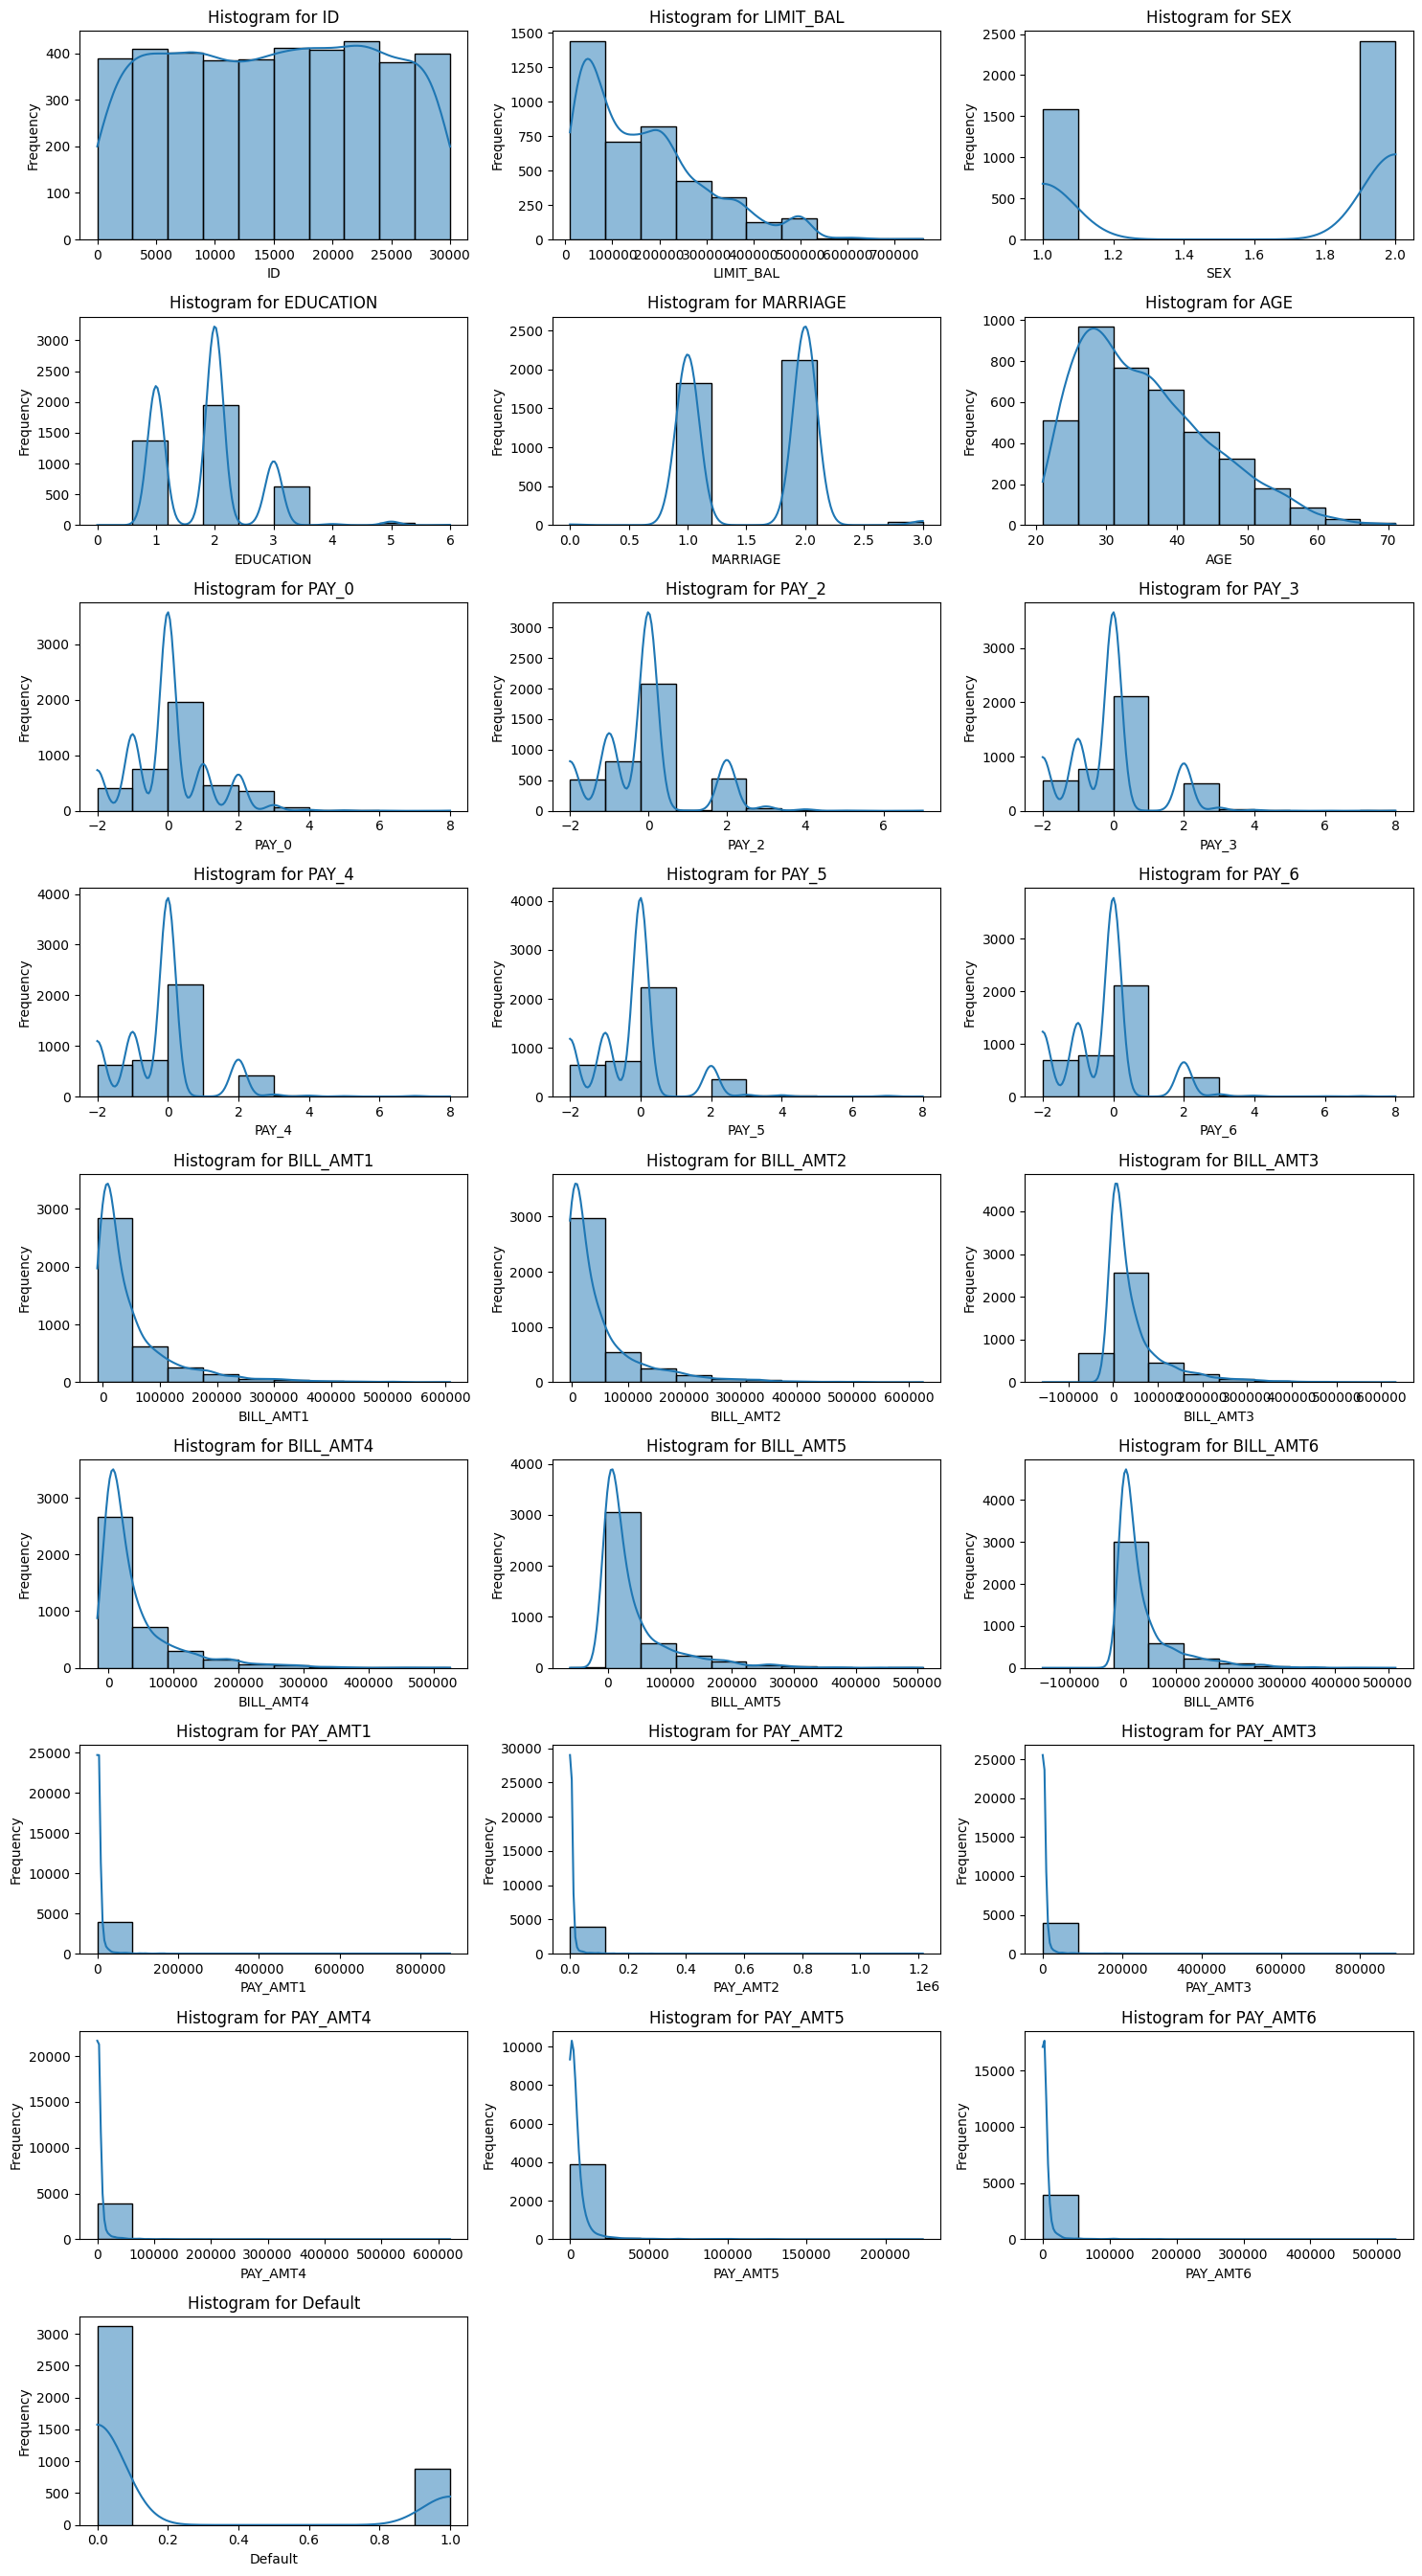

In [ ]:
#b. Plot the univariate distribution.
n_cols = 3

# Calculate the number of rows needed (rounding up if necessary)
n_rows = (len(dataset_credit_test.columns) + n_cols - 1) // n_cols

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each column
for i, column in enumerate(dataset_credit_test.columns):
    sns.histplot(dataset_credit_test[column], bins=10, kde=True, edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Histogram for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()

In [ ]:
#c. Convert the relevant variables such as payment variables (Pay0-Pay6 and customer related variables)
#to categorical variables as appropriate.
# List of PAY_0 to PAY_6 columns
selected_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5','PAY_6','EDUCATION', 'SEX','MARRIAGE']

# Check the datatype of pay_columns
print(dataset_credit_test[selected_columns].dtypes)

PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
EDUCATION    int64
SEX          int64
MARRIAGE     int64
dtype: object


In [ ]:
# Convert selected columns to categorical
for col in selected_columns:
    dataset_credit_test[col] = dataset_credit_test[col].astype('category')

# Check the data again to insure if it converted into catagorical data properly
print(dataset_credit_test[selected_columns].dtypes)

PAY_0        category
PAY_2        category
PAY_3        category
PAY_4        category
PAY_5        category
PAY_6        category
EDUCATION    category
SEX          category
MARRIAGE     category
dtype: object


In [ ]:
dataset_credit_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         4000 non-null   int64   
 1   LIMIT_BAL  4000 non-null   int64   
 2   SEX        4000 non-null   category
 3   EDUCATION  4000 non-null   category
 4   MARRIAGE   4000 non-null   category
 5   AGE        4000 non-null   int64   
 6   PAY_0      4000 non-null   category
 7   PAY_2      4000 non-null   category
 8   PAY_3      4000 non-null   category
 9   PAY_4      4000 non-null   category
 10  PAY_5      4000 non-null   category
 11  PAY_6      4000 non-null   category
 12  BILL_AMT1  4000 non-null   float64 
 13  BILL_AMT2  4000 non-null   int64   
 14  BILL_AMT3  4000 non-null   int64   
 15  BILL_AMT4  4000 non-null   int64   
 16  BILL_AMT5  4000 non-null   float64 
 17  BILL_AMT6  4000 non-null   int64   
 18  PAY_AMT1   4000 non-null   int64   
 19  PAY_AMT2   4000 non-null   

In [ ]:
#dropping the id column to focus onto the features helpful for our model for doing prdiction
dataset_test= dataset_credit_test.drop('ID', axis=1)

We are dropping the variables which are causing muticolinearity

In [ ]:
#dropping variables
dataset_test = dataset_test.drop(columns=['PAY_5','PAY_2', 'PAY_4','PAY_3','BILL_AMT5','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT1','BILL_AMT6'])

In [ ]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   LIMIT_BAL  4000 non-null   int64   
 1   SEX        4000 non-null   category
 2   EDUCATION  4000 non-null   category
 3   MARRIAGE   4000 non-null   category
 4   AGE        4000 non-null   int64   
 5   PAY_0      4000 non-null   category
 6   PAY_6      4000 non-null   category
 7   BILL_AMT2  4000 non-null   int64   
 8   PAY_AMT1   4000 non-null   int64   
 9   PAY_AMT2   4000 non-null   float64 
 10  PAY_AMT3   4000 non-null   float64 
 11  PAY_AMT4   4000 non-null   float64 
 12  PAY_AMT5   4000 non-null   float64 
 13  PAY_AMT6   4000 non-null   float64 
 14  Default    4000 non-null   int64   
dtypes: category(5), float64(5), int64(5)
memory usage: 333.6 KB


In [ ]:
X_test = dataset_test.drop('Default', axis=1)
y_test= dataset_test['Default']
X_test.info()
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   LIMIT_BAL  4000 non-null   int64   
 1   SEX        4000 non-null   category
 2   EDUCATION  4000 non-null   category
 3   MARRIAGE   4000 non-null   category
 4   AGE        4000 non-null   int64   
 5   PAY_0      4000 non-null   category
 6   PAY_6      4000 non-null   category
 7   BILL_AMT2  4000 non-null   int64   
 8   PAY_AMT1   4000 non-null   int64   
 9   PAY_AMT2   4000 non-null   float64 
 10  PAY_AMT3   4000 non-null   float64 
 11  PAY_AMT4   4000 non-null   float64 
 12  PAY_AMT5   4000 non-null   float64 
 13  PAY_AMT6   4000 non-null   float64 
dtypes: category(5), float64(5), int64(4)
memory usage: 302.3 KB
<class 'pandas.core.series.Series'>
RangeIndex: 4000 entries, 0 to 3999
Series name: Default
Non-Null Count  Dtype
--------------  -----
4000 non-null   int64
dtypes: int64

In [ ]:
# Step 1: Scale the Features
#scaler = StandardScaler()

# Fit the scaler on training data
#scaler.fit(X_train_balanced)

# Transform test data
#X_train_scaled = scaler.transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Step 2: Encode the Target Variable
#label_encoder = LabelEncoder()

# Fit the label encoder on the target data
#y_train_encoded = label_encoder.fit_transform(y_train_balanced)
y_test_encoded = label_encoder.transform(y_test)

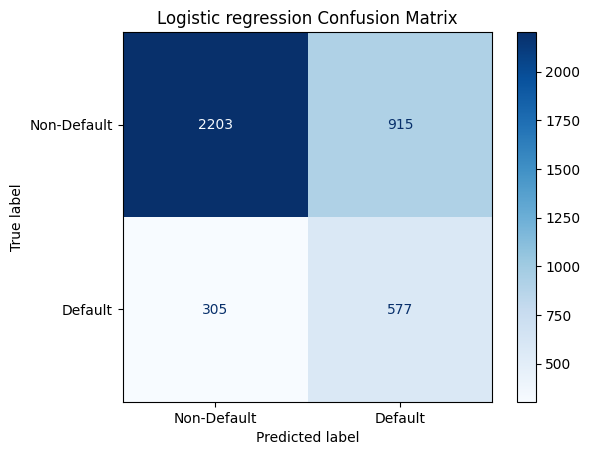

Accuracy: 0.69
Logistic regression Confusion Matrix:
[[2203  915]
 [ 305  577]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.71      0.78      3118
           1       0.39      0.65      0.49       882

    accuracy                           0.69      4000
   macro avg       0.63      0.68      0.63      4000
weighted avg       0.77      0.69      0.72      4000



In [ ]:
#2.4	Test the model on the test dataset. Please note that the variable conversion in the raw data, similar to Task 1.2 should be applied.
# Predict on the test set
y_pred_logistic = model.predict(X_test_scaled)

# 2.5 Plot the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_logistic)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Default', 'Default'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Logistic regression Confusion Matrix')
plt.show()

# 2.6 Provide insights
accuracy = accuracy_score(y_test_encoded, y_pred_logistic)


print(f'Accuracy: {accuracy:.2f}')
# 2.5 Plot the confusion matrix
#Confusion Matrix and Classification Report
cm = confusion_matrix(y_test_encoded, y_pred_logistic)
print("Logistic regression Confusion Matrix:")
print(cm)

report = classification_report(y_test_encoded, y_pred_logistic)
print("Classification Report:")
print(report)

<h3><b>2.6	Provide your insights on accuracy, precision and F1 Score in a markdown cell in your Jupyter notebook.</b></h3>

<b>Accuracy:</b>

training accuracy is 0.69

testing accuracy is 0.69

based on accuracy, for testing and training dataset model perform same.

Weighted avg F1 score for training: 0.71

Weighted avg F1 score for testing: 0.72

based on weighted avg F1 score model perform better for testing data. shows that the model is not overfitting and providing a good generalisation.

<b>Precision:</b>

for training non defaulter is 0.87

for testing non defaulter is 0.88

for training defaulter is 0.38

for testing  defaulter is 0.39

Precision of model for non defaulter is good for both training and testing. Model is pretty good in identifying non defaulters.While the precision is low for defaulter in both tesing and training. it shows the model is not so good for identifying defaulters.

<b>Recall:</b>

for training non defaulter is 0.70

for testing non defaulter is 0.71

for training defaulter is 0.64

for testing  defaulter is 0.65

for non defaulter recall for testing is higher than the recall in for training dataset.Tt means the model is doing good generalisation for non defaulters. same is for defaulters also.

<b>F1 score: </b>

for training non defaulter is 0.78

for testing non defaulter is 0.78

for training defaulter is 0.47

for testing  defaulter is 0.49

F1 score is consistent in both training and testing for non defaulters. this shows the stable performance of model in identifying non defaulters. however, F1 score for defaulters is low for both testing and training. F1 score increased slightly for testing dataset showing that model marginally performs better for unseen data. and this is the area of improvement for identying defaulters.



<h4><b>Task 3: <br>
3.1	Fit a random forest model on “Train.csv” with a random state of 1, 500 estimators, a maximum depth of 3 and a maximum feature of 3.</br>

3.2	Evaluate the confusion matrix, F1 scores and accuracy. Compare the random forest model with the logistic regression from Task 2. State your observations in a markdown cell in your Jupyter notebook.</b></h4>


In [ ]:
#3.1	Fit a random forest model on “Train.csv” with a random state of 1, 500 estimators, a maximum depth of 3
#and a maximum feature of 3.
# Fit the random forest model

rf_model = RandomForestClassifier(n_estimators=500, max_depth=3, max_features=3, random_state=1, class_weight=class_weights_dict)
rf_model.fit(X_train_scaled, y_train_encoded)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

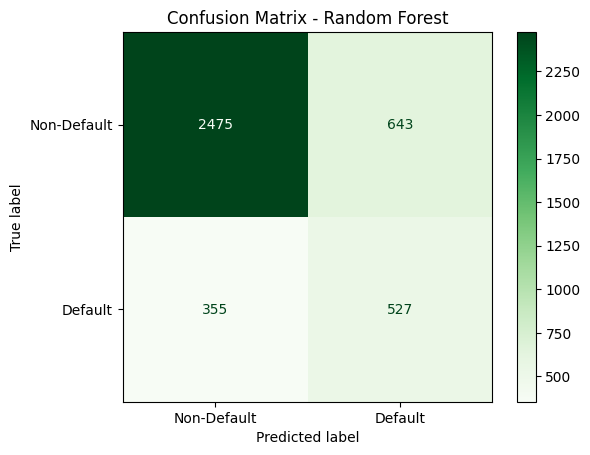

Random Forest Accuracy: 0.75
Random Forest Confusion Matrix:
[[2475  643]
 [ 355  527]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      3118
           1       0.45      0.60      0.51       882

    accuracy                           0.75      4000
   macro avg       0.66      0.70      0.67      4000
weighted avg       0.78      0.75      0.76      4000



In [ ]:
# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test_encoded, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Non-Default', 'Default'])
disp_rf.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Evaluate accuracy, precision, and F1 score for Random Forest
accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)


print(f'Random Forest Accuracy: {accuracy_rf:.2f}')


#Confusion Matrix and Classification Report
cm = confusion_matrix(y_test_encoded, y_pred_rf)
print("Random Forest Confusion Matrix:")
print(cm)

report = classification_report(y_test_encoded, y_pred_rf)
print("Classification Report:")
print(report)

<b><h3>Task 3.2: Comparison of Logistic Regression and Random Forest Models</b></h3>

- Logistic regression model testing accuracy is 0.69. The Random Forest model has a testing accuracy of 0.75 which is higher than the accuracy achieved in logistic Regression model.

- The precision of the Random Forest and logistic regression model for non default is 0.87 and 0.88 respecitively.

- The precision of the Random Forest for default is 0.45 which is higher compared to Logistic Regression. Precision for default for logistic regression model is 0.39.

- The Recall of the Random Forest for default is 0.60 which is lower compared to Logistic Regression. Recall for default for logistic regression model is 0.65.

- The Recall of the Random Forest for non default is 0.79 which is higher compared to Logistic Regression. Recall for non default for logistic regression model is 0.71.

- The F1 Score of Random Forest for non default is 0.83 indicates that it is better at balancing precision and recall compared to Logistic Regression. F1 score for non default of logistic regression model is 0.78.

- The F1 Score of Random Forest for default is 0.51 indicates that it is better at balancing precision and recall compared to Logistic Regression. F1 score for default of logistic regression model is 0.49.

<b>Overall Metrices for Logistic regression:</b>

Accuracy:0.69

Weighted avg F1 score:0.72


<b>Overall Metrices for Random forest:</b>

Accuracy: 0.75

weighted avg F1 score: 0.76

- Based on F1 score and Accuracy, performance of random forest model is better than Logistic regression in this case.

<b><h3>Task 4:</h3></b>

4.1	Fit support vector machine (SVM) algorithms on “Train.csv” with the following parameters: gamma = 0.025
C=3.

4.2	Provide the confusion matrix, F1 scores and accuracy in a markdown cell in your Jupyter notebook.



In [ ]:
#4.1 Fit support vector machine (SVM) algorithms on “Train.csv” with the following parameters: gamma = 0.025 C=3.
# Fit the SVM model
svm_model = SVC(gamma=0.025, C=3, random_state=1, class_weight=class_weights_dict)
svm_model.fit(X_train_scaled, y_train_encoded)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

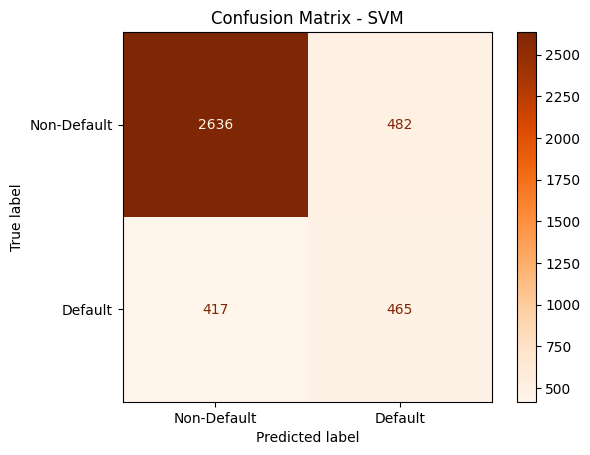

SVM Accuracy: 0.78
SVM Confusion Matrix:
[[2636  482]
 [ 417  465]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      3118
           1       0.49      0.53      0.51       882

    accuracy                           0.78      4000
   macro avg       0.68      0.69      0.68      4000
weighted avg       0.78      0.78      0.78      4000



In [ ]:
# Confusion matrix for SVM
cm_svm = confusion_matrix(y_test_encoded, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['Non-Default', 'Default'])
disp_svm.plot(cmap=plt.cm.Oranges)
plt.title('Confusion Matrix - SVM')
plt.show()

# Evaluate accuracy, precision, and F1 score for SVM
accuracy_svm = accuracy_score(y_test_encoded, y_pred_svm)

print(f'SVM Accuracy: {accuracy_svm:.2f}')


 #Confusion Matrix and Classification Report
cm = confusion_matrix(y_test_encoded, y_pred_svm)
print("SVM Confusion Matrix:")
print(cm)

report = classification_report(y_test_encoded, y_pred_svm)
print("Classification Report:")
print(report)

<b> 4.2 Provide the confusion matrix, F1 scores and accuracy in a markdown cell in your Jupyter notebook.</b>

SVM Confusion Matrix:
[[2636  482]
 [ 417  465]]

Precison:

 for 0 (non defaulter) is 0.86

 for 1 (defaulter) is 0.49

 Recall:

 for 0 (non defaulter) is 0.85

 for 1 (defaulter) is 0.53


 F1 Score:

 for 0 (non defaulter) is 0.85

 for 1 (defaulter) is 0.51

 Accuracy:
 is  0.78

 Weighted avg F1 score:
 0.78


<h3><b>Task 5:</b> </h3>

5.1	Fit an ANN model (sequential) with 16 input neurons and add two hidden layers with 8 neurons each.

5.2	Use “relu” activation and adam optimiser. Use the normal kernel initialiser. Run it for 100 epochs on “train.csv” with a batch size of 15.


5.3	Provide the confusion matrix, F1 scores and accuracy on the test dataset in a markdown cell in your Jupyter notebook.


In [ ]:
#Task 5: 5.1 Fit an ANN model (sequential) with 16 input neurons and add two hidden layers with 8 neurons each.
#5.2 Use “relu” activation and adam optimiser. Use the normal kernel initialiser. Run it for 100 epochs on “train.csv”
#with a batch size of 15

# Initialize the ANN model
ann_model = Sequential()

# Input layer with 16 neurons, two hidden layers with 8 neurons each
ann_model.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='relu', kernel_initializer='normal'))

# Two hidden layers with 8 neurons each
ann_model.add(Dense(8, activation='relu', kernel_initializer='normal'))
ann_model.add(Dense(8, activation='relu', kernel_initializer='normal'))

# Output layer with 1 neuron (binary classification)
ann_model.add(Dense(1, activation='sigmoid'))

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for 100 epochs with batch size of 15
ann_model.fit(X_train_scaled, y_train_encoded, epochs=100, batch_size=15, class_weight=class_weights_dict, verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6702 - loss: 0.6241
Epoch 2/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7743 - loss: 0.5908
Epoch 3/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7777 - loss: 0.5818
Epoch 4/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7708 - loss: 0.5774
Epoch 5/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7694 - loss: 0.5686
Epoch 6/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7651 - loss: 0.5687
Epoch 7/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7547 - loss: 0.5735
Epoch 8/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7536 - loss: 0.5702
Epoch 9/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7549 - loss: 0.5694
Epoch 10/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7576 - loss: 0.5662
Epoch 11/100
1734/1734 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7549 - loss: 0.5685
Epoch 12/100
1734/1

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ANN Confusion Matrix:
 [[2480  638]
 [ 348  534]]

ANN Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.80      0.83      3118
           1       0.46      0.61      0.52       882

    accuracy                           0.75      4000
   macro avg       0.67      0.70      0.68      4000
weighted avg       0.78      0.75      0.76      4000


ANN Accuracy: 0.7535


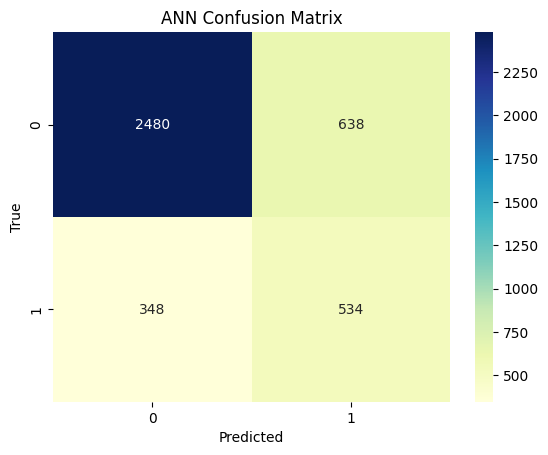

In [ ]:
# Predict on the test set
y_pred_ann = ann_model.predict(X_test_scaled)
y_pred_ann = (y_pred_ann > 0.5).astype(int)  # Thresholding the predictions

# Confusion matrix
conf_matrix_ann = confusion_matrix(y_test_encoded, y_pred_ann)
print("ANN Confusion Matrix:\n", conf_matrix_ann)

# Classification report
print("\nANN Classification Report:\n", classification_report(y_test_encoded, y_pred_ann))

# Accuracy score
accuracy_ann = accuracy_score(y_test_encoded, y_pred_ann)
print("\nANN Accuracy:", accuracy_ann)

# Plot the confusion matrix
sns.heatmap(conf_matrix_ann, annot=True, fmt="d", cmap="YlGnBu")
plt.title('ANN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


<b>5.3 Provide the confusion matrix, F1 scores and accuracy on the test dataset in a markdown cell in your Jupyter notebook.</b><br>
ANN Confusion Matrix:

 [[2480  638]
 [ 348  534]]

precision:

 for 0 (non defaulter) is 0.88

 for 1 (defaulter) is 0.46

Recall:

 for 0 (non defaulter) is 0.80

 for 1 (defaulter) is 0.61

 F1 Score:

 for 0 (non defaulter) is 0.83

 for 1 (defaulter) is 0.52

 Accuracy:
 is 0.75

 Weighted avg F1 score: 0.76


<b><h3>Task 6:</h3></b>
<h4> Explain which model you will use based on the evaluation metrics on the test dataset among all the models from Task 2 to Task 5 (logistic regression, random forest, SVM and ANN) and explain why. Put your answer in a markdown cell in your Jupyter notebook.
</h4>

Based on F1 score and accuracy, SVM has the best performance.

performance metrices for SVM model are as follows

F1 score for (0)non default :0.85

F1 score for (1)default:0.51

Weighted avg F1 score: 0.78

Accuracy: 0.78

SVM model have accuracy and F1 score higher than ANN and Logitic regression model in current situation. Performance of SVM is better than ANN, Random forest and logistic regression in our case. Having a highest accuracy shows that it is classifying most of the instances  correctly than the other models do.
for non defaulter SVM is showing an F! score of 0.85 which shows it's strong ability to identify non default while keeping a good balance between recall and precision. F1 score for default is 0.51 is higher than for the other models. But it is still low. It is the area where we neeed to bring the improvement.
SVM provide Kernel trick. It is adaptable for the non linear data as well. SVM works well when the features are highly correlated and when there is noise. SVM provide Kernel trick. It is adaptable for the non linear data as well. SVM is easy to interpret. We can look at Support vectors and the decision boundary for understanding how the model is making its decisions.